# Imports

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

import missingno as msno
import re
from datetime import datetime

plt.style.use("fivethirtyeight")

# Gather and Clean Data

In [2]:
df = pd.read_csv('data/bank_tran.csv')
df

,Unnamed: 0,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Time,Amount
0,0,T815188,C4429479,6/6/64,M,SECUNDERABAD,113492.404193,12/9/16,161381,1329.537997
1,1,T447012,C5437542,17/10/86,NaN,GANJAM,122888.497864,17/8/16,113813,907.299431
2,2,T543943,C6223255,21/9/79,M,MUMBAI,1.100255,30/9/16,167583,2292.010551
3,3,T216520,C1236474,23/6/94,F,BULADHANA,361.272904,8/8/16,195413,1321.733798
4,4,T232075,C6769961,13/12/82,F,CHAMPARAN MOTIHARI,6487.068577,23/8/16,89486,118.242970
...,...,...,...,...,...,...,...,...,...,...
1048562,1048562,T522748,C5417315,8/8/66,M,GURGAON,57819.257179,31/8/16,161281,1119.933560
1048563,1048563,T211546,C7827586,6/5/91,F,DIST RAIGAD PANVEL,173984.507491,21/10/16,106831,656.627214
1048564,1048564,T886043,C5314662,14/9/87,F,BOISAR,13.855252,28/8/16,196027,1218.263934
1048565,1048565,T415693,C6937532,15/7/82,F,CHAS BOKARO,2472.115344,23/8/16,146502,804.150409


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df

,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Time,Amount
0,T815188,C4429479,6/6/64,M,SECUNDERABAD,113492.404193,12/9/16,161381,1329.537997
1,T447012,C5437542,17/10/86,NaN,GANJAM,122888.497864,17/8/16,113813,907.299431
2,T543943,C6223255,21/9/79,M,MUMBAI,1.100255,30/9/16,167583,2292.010551
3,T216520,C1236474,23/6/94,F,BULADHANA,361.272904,8/8/16,195413,1321.733798
4,T232075,C6769961,13/12/82,F,CHAMPARAN MOTIHARI,6487.068577,23/8/16,89486,118.242970
...,...,...,...,...,...,...,...,...,...
1048562,T522748,C5417315,8/8/66,M,GURGAON,57819.257179,31/8/16,161281,1119.933560
1048563,T211546,C7827586,6/5/91,F,DIST RAIGAD PANVEL,173984.507491,21/10/16,106831,656.627214
1048564,T886043,C5314662,14/9/87,F,BOISAR,13.855252,28/8/16,196027,1218.263934
1048565,T415693,C6937532,15/7/82,F,CHAS BOKARO,2472.115344,23/8/16,146502,804.150409


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ID              1048567 non-null  object 
 1   CustomerID      1048567 non-null  object 
 2   DateOfBirth     1048302 non-null  object 
 3   Gender          933907 non-null   object 
 4   Location        1048148 non-null  object 
 5   AccountBalance  1046142 non-null  float64
 6   Date            1048567 non-null  object 
 7   Time            1048567 non-null  int64  
 8   Amount          1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
df.isnull().sum()

ID                     0
CustomerID             0
DateOfBirth          265
Gender            114660
Location             419
AccountBalance      2425
Date                   0
Time                   0
Amount                 0
dtype: int64

In [7]:
total = 1048567

pct_missing_bday= (265 /total)*100
print('Pct of Missing Date of Birth:', pct_missing_bday)
pct_missing_location= (419 /total)*100
print('Pct of Missing Location:', pct_missing_location)
pct_missing_account= (2425 /total)*100
print('Pct of Missing Accoun Balance:', pct_missing_account)
pct_missing_gender= (114660 /total)*100
print('Pct of Missing Gender:', pct_missing_gender)

Pct of Missing Date of Birth: 0.025272586301113807
Pct of Missing Location: 0.03995929683081768
Pct of Missing Accoun Balance: 0.23126800671773953
Pct of Missing Gender: 10.934923567115883


In [8]:
df = df.dropna(subset=['DateOfBirth','Location','AccountBalance'])

In [9]:
df.isnull().sum()

ID                     0
CustomerID             0
DateOfBirth            0
Gender            114333
Location               0
AccountBalance         0
Date                   0
Time                   0
Amount                 0
dtype: int64

In [10]:
#Check for duplicated values
df.duplicated().sum()

0

Missing data from Date of Birth, Location and Account Balance are quite low we can delete them

<Axes: >

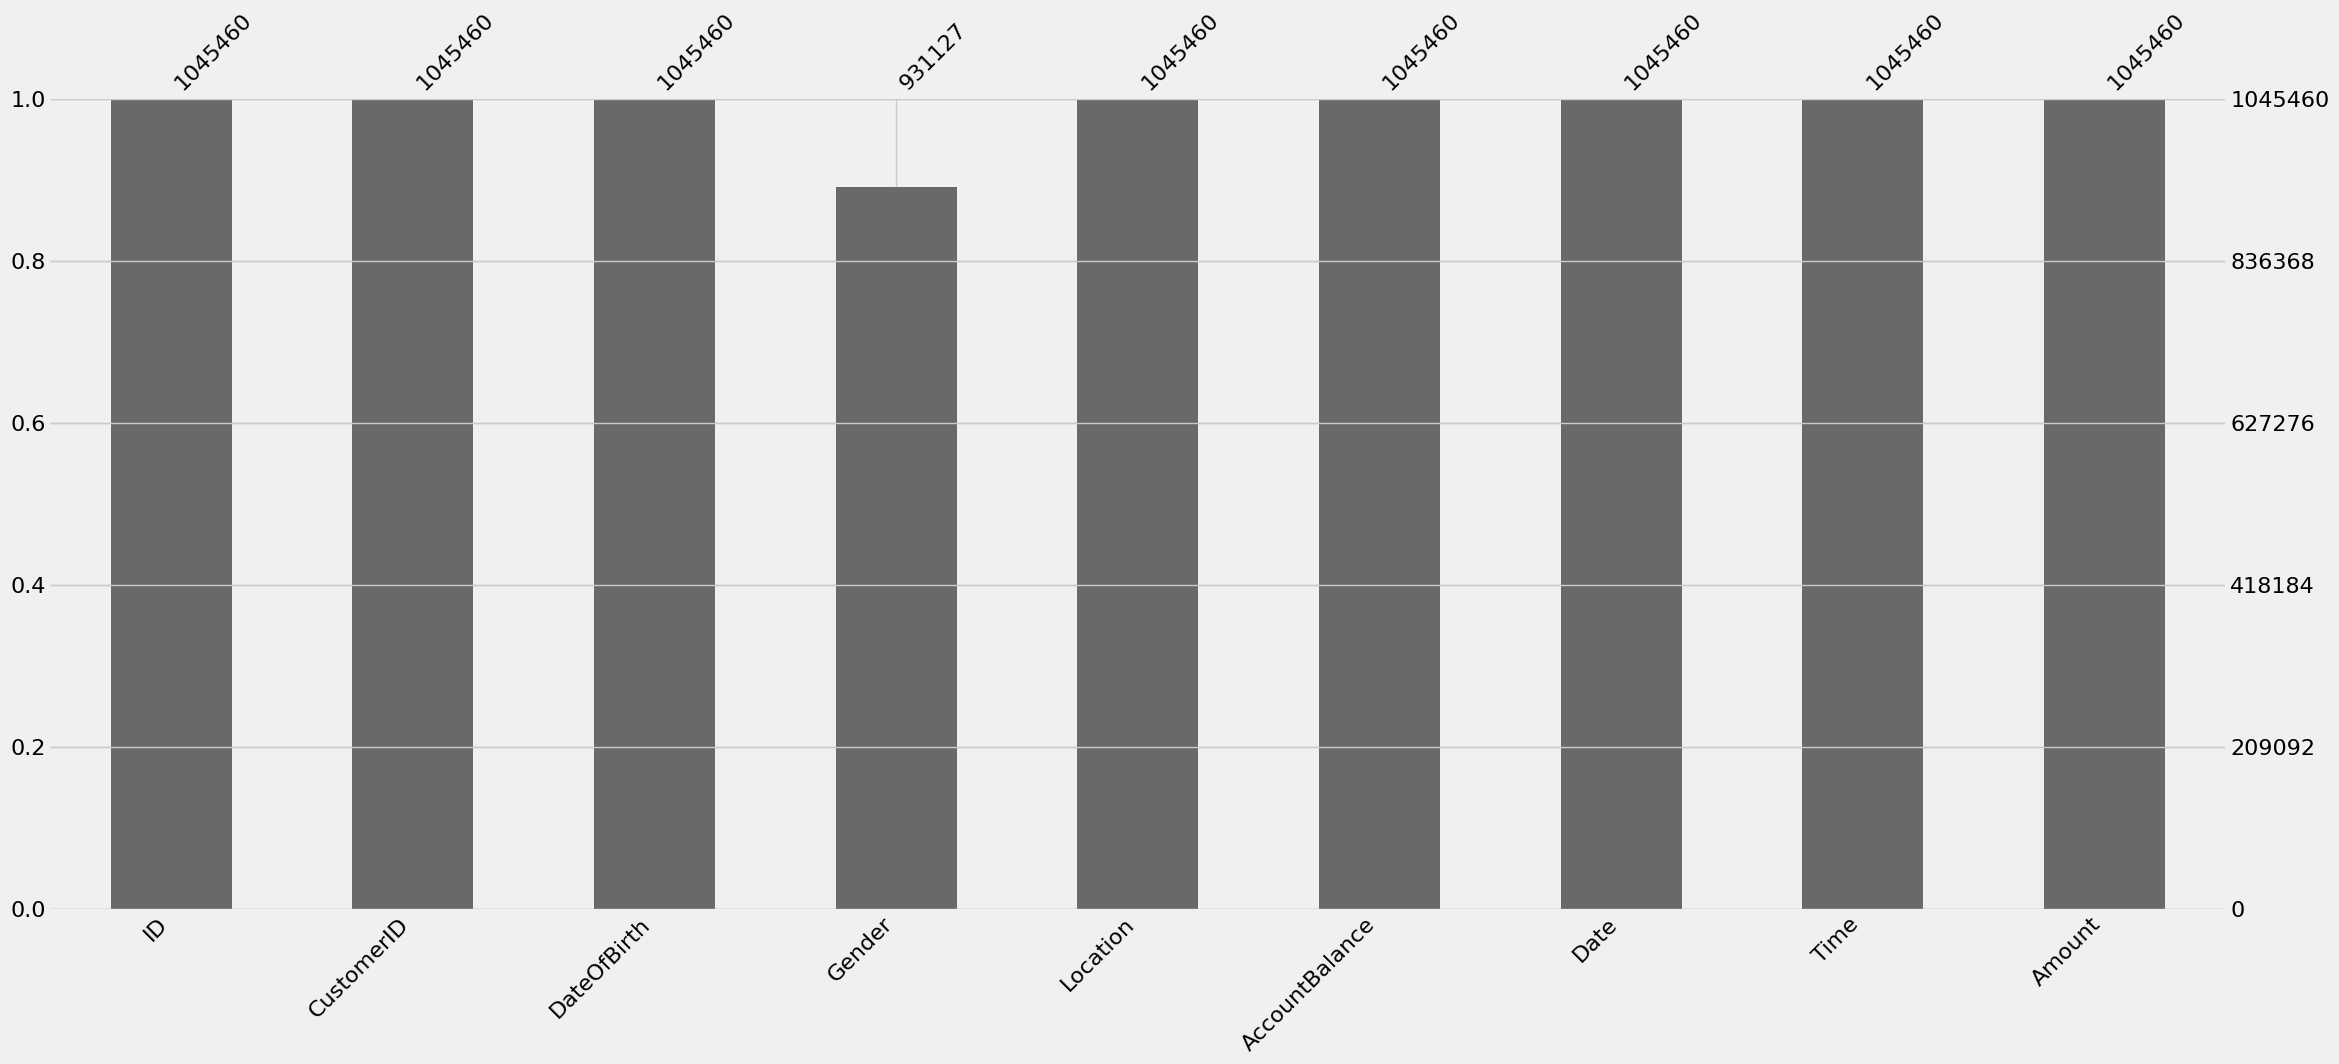

In [11]:
msno.bar(df)

In [12]:
df.Gender.value_counts()

Gender
M    491438
F    438189
T      1500
Name: count, dtype: int64

In [13]:
# T probably was a mistake lets take that as a NaN value too
df['Gender'].replace('T', np.nan, inplace=True)

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/3626581352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace('T', np.nan, inplace=True)
/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/3626581352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'].replace('T', np.nan, inplace=T

In [14]:
# Let's impute data with most frequent value from gender column
mode_gender = df['Gender'].mode()[0]

df['Gender'].fillna(mode_gender, inplace=True)

df.Gender.value_counts()

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/806051776.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(mode_gender, inplace=True)
/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/806051776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'].fillna(mode_gender, inplace=True)

Gender
M    607271
F    438189
Name: count, dtype: int64

In [15]:
df.isnull().sum()

ID                0
CustomerID        0
DateOfBirth       0
Gender            0
Location          0
AccountBalance    0
Date              0
Time              0
Amount            0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045460 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ID              1045460 non-null  object 
 1   CustomerID      1045460 non-null  object 
 2   DateOfBirth     1045460 non-null  object 
 3   Gender          1045460 non-null  object 
 4   Location        1045460 non-null  object 
 5   AccountBalance  1045460 non-null  float64
 6   Date            1045460 non-null  object 
 7   Time            1045460 non-null  int64  
 8   Amount          1045460 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.8+ MB


In [17]:
df

,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Time,Amount
0,T815188,C4429479,6/6/64,M,SECUNDERABAD,113492.404193,12/9/16,161381,1329.537997
1,T447012,C5437542,17/10/86,M,GANJAM,122888.497864,17/8/16,113813,907.299431
2,T543943,C6223255,21/9/79,M,MUMBAI,1.100255,30/9/16,167583,2292.010551
3,T216520,C1236474,23/6/94,F,BULADHANA,361.272904,8/8/16,195413,1321.733798
4,T232075,C6769961,13/12/82,F,CHAMPARAN MOTIHARI,6487.068577,23/8/16,89486,118.242970
...,...,...,...,...,...,...,...,...,...
1048562,T522748,C5417315,8/8/66,M,GURGAON,57819.257179,31/8/16,161281,1119.933560
1048563,T211546,C7827586,6/5/91,F,DIST RAIGAD PANVEL,173984.507491,21/10/16,106831,656.627214
1048564,T886043,C5314662,14/9/87,F,BOISAR,13.855252,28/8/16,196027,1218.263934
1048565,T415693,C6937532,15/7/82,F,CHAS BOKARO,2472.115344,23/8/16,146502,804.150409


In [18]:
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'])
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/3118075055.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'])


/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/3118075055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'])
/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/3118075055.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/3118075055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [19]:
df

,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Time,Amount
0,T815188,C4429479,2064-06-06,M,SECUNDERABAD,113492.404193,2016-12-09,161381,1329.537997
1,T447012,C5437542,1986-10-17,M,GANJAM,122888.497864,2016-08-17,113813,907.299431
2,T543943,C6223255,1979-09-21,M,MUMBAI,1.100255,2016-09-30,167583,2292.010551
3,T216520,C1236474,1994-06-23,F,BULADHANA,361.272904,2016-08-08,195413,1321.733798
4,T232075,C6769961,1982-12-13,F,CHAMPARAN MOTIHARI,6487.068577,2016-08-23,89486,118.242970
...,...,...,...,...,...,...,...,...,...
1048562,T522748,C5417315,2066-08-08,M,GURGAON,57819.257179,2016-08-31,161281,1119.933560
1048563,T211546,C7827586,1991-06-05,F,DIST RAIGAD PANVEL,173984.507491,2016-10-21,106831,656.627214
1048564,T886043,C5314662,1987-09-14,F,BOISAR,13.855252,2016-08-28,196027,1218.263934
1048565,T415693,C6937532,1982-07-15,F,CHAS BOKARO,2472.115344,2016-08-23,146502,804.150409


In [20]:
# To solve pd.datetime problem for old date format 
df['DateOfBirth'] = df['DateOfBirth'].apply(lambda x: x.replace(year=x.year - 100) if x.year > 2023 else x)
df

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/2642859296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateOfBirth'] = df['DateOfBirth'].apply(lambda x: x.replace(year=x.year - 100) if x.year > 2023 else x)


,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Time,Amount
0,T815188,C4429479,1964-06-06,M,SECUNDERABAD,113492.404193,2016-12-09,161381,1329.537997
1,T447012,C5437542,1986-10-17,M,GANJAM,122888.497864,2016-08-17,113813,907.299431
2,T543943,C6223255,1979-09-21,M,MUMBAI,1.100255,2016-09-30,167583,2292.010551
3,T216520,C1236474,1994-06-23,F,BULADHANA,361.272904,2016-08-08,195413,1321.733798
4,T232075,C6769961,1982-12-13,F,CHAMPARAN MOTIHARI,6487.068577,2016-08-23,89486,118.242970
...,...,...,...,...,...,...,...,...,...
1048562,T522748,C5417315,1966-08-08,M,GURGAON,57819.257179,2016-08-31,161281,1119.933560
1048563,T211546,C7827586,1991-06-05,F,DIST RAIGAD PANVEL,173984.507491,2016-10-21,106831,656.627214
1048564,T886043,C5314662,1987-09-14,F,BOISAR,13.855252,2016-08-28,196027,1218.263934
1048565,T415693,C6937532,1982-07-15,F,CHAS BOKARO,2472.115344,2016-08-23,146502,804.150409


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045460 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   ID              1045460 non-null  object        
 1   CustomerID      1045460 non-null  object        
 2   DateOfBirth     1045460 non-null  datetime64[ns]
 3   Gender          1045460 non-null  object        
 4   Location        1045460 non-null  object        
 5   AccountBalance  1045460 non-null  float64       
 6   Date            1045460 non-null  datetime64[ns]
 7   Time            1045460 non-null  int64         
 8   Amount          1045460 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.8+ MB


In [22]:
# Since we dont know what this time columns indicates we will delete 
df.drop(columns=['Time'], inplace=True)

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/2355204278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Time'], inplace=True)


In [23]:
df

,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Amount
0,T815188,C4429479,1964-06-06,M,SECUNDERABAD,113492.404193,2016-12-09,1329.537997
1,T447012,C5437542,1986-10-17,M,GANJAM,122888.497864,2016-08-17,907.299431
2,T543943,C6223255,1979-09-21,M,MUMBAI,1.100255,2016-09-30,2292.010551
3,T216520,C1236474,1994-06-23,F,BULADHANA,361.272904,2016-08-08,1321.733798
4,T232075,C6769961,1982-12-13,F,CHAMPARAN MOTIHARI,6487.068577,2016-08-23,118.242970
...,...,...,...,...,...,...,...,...
1048562,T522748,C5417315,1966-08-08,M,GURGAON,57819.257179,2016-08-31,1119.933560
1048563,T211546,C7827586,1991-06-05,F,DIST RAIGAD PANVEL,173984.507491,2016-10-21,656.627214
1048564,T886043,C5314662,1987-09-14,F,BOISAR,13.855252,2016-08-28,1218.263934
1048565,T415693,C6937532,1982-07-15,F,CHAS BOKARO,2472.115344,2016-08-23,804.150409


In [24]:
df.describe()

,DateOfBirth,AccountBalance,Date,Amount
count,1045460,1.045460e+06,1045460,1.045460e+06
mean,1981-05-09 23:51:24.224743104,1.183192e+05,2016-08-02 20:03:27.709524736,1.571671e+03
min,1800-01-01 00:00:00,0.000000e+00,2016-01-08 00:00:00,3.675698e-09
25%,1975-03-14 00:00:00,3.012634e+03,2016-07-09 00:00:00,1.425629e+02
50%,1984-05-25 00:00:00,3.012883e+04,2016-08-24 00:00:00,6.835538e+02
75%,1990-07-30 00:00:00,1.368044e+05,2016-09-22 00:00:00,2.059016e+03
max,2023-06-08 00:00:00,3.796507e+06,2016-12-09 00:00:00,3.585288e+04
std,NaN,2.129471e+05,NaN,2.279515e+03


In [25]:
df[df['DateOfBirth'] < '1801-01-01']

,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Amount
1923,T572561,C7415932,1800-01-01,F,WARANGAL,470274.439578,2016-08-25,412.137569
2735,T354175,C3512172,1800-01-01,F,JAMSHEDPUR,27905.939246,2016-02-09,9042.988926
3107,T20362,C6711668,1800-01-01,M,KAPURTHALA,5497.991949,2016-02-08,5551.707659
13708,T306988,C7514143,1800-01-01,M,ITANAGAR,12512.371833,2016-08-19,3025.052919
17193,T672391,C8847871,1800-01-01,F,PONDA NORTH,9201.174480,2016-08-15,2074.595551
...,...,...,...,...,...,...,...,...
1038497,T304433,C5554181,1800-01-01,M,PALGHAR,6104.408524,2016-12-08,518.820353
1040088,T843188,C6118237,1800-01-01,M,ULHASNAGAR-1 THANE,5104.860733,2016-08-09,5101.848573
1041075,T654356,C2313391,1800-01-01,M,THANJAVUR,312507.621842,2016-08-25,113.538148
1044710,T902927,C4714174,1800-01-01,F,HYDERABAD,96741.404679,2016-02-09,1948.877824


490 of customer birthday are 1800-01-01 however their account still active. Check the percentage

In [26]:
(490 / 1045460)*100

0.04686932068180514

0.05% quite low we can delete these data

In [27]:
df = df[df['DateOfBirth'] > '1801-01-01']

In [28]:
df[df['DateOfBirth'] < '1801-01-01']

,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Amount


In [29]:
df

,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Amount
0,T815188,C4429479,1964-06-06,M,SECUNDERABAD,113492.404193,2016-12-09,1329.537997
1,T447012,C5437542,1986-10-17,M,GANJAM,122888.497864,2016-08-17,907.299431
2,T543943,C6223255,1979-09-21,M,MUMBAI,1.100255,2016-09-30,2292.010551
3,T216520,C1236474,1994-06-23,F,BULADHANA,361.272904,2016-08-08,1321.733798
4,T232075,C6769961,1982-12-13,F,CHAMPARAN MOTIHARI,6487.068577,2016-08-23,118.242970
...,...,...,...,...,...,...,...,...
1048562,T522748,C5417315,1966-08-08,M,GURGAON,57819.257179,2016-08-31,1119.933560
1048563,T211546,C7827586,1991-06-05,F,DIST RAIGAD PANVEL,173984.507491,2016-10-21,656.627214
1048564,T886043,C5314662,1987-09-14,F,BOISAR,13.855252,2016-08-28,1218.263934
1048565,T415693,C6937532,1982-07-15,F,CHAS BOKARO,2472.115344,2016-08-23,804.150409


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044970 entries, 0 to 1048566
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   ID              1044970 non-null  object        
 1   CustomerID      1044970 non-null  object        
 2   DateOfBirth     1044970 non-null  datetime64[ns]
 3   Gender          1044970 non-null  object        
 4   Location        1044970 non-null  object        
 5   AccountBalance  1044970 non-null  float64       
 6   Date            1044970 non-null  datetime64[ns]
 7   Amount          1044970 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 71.8+ MB


## EDA

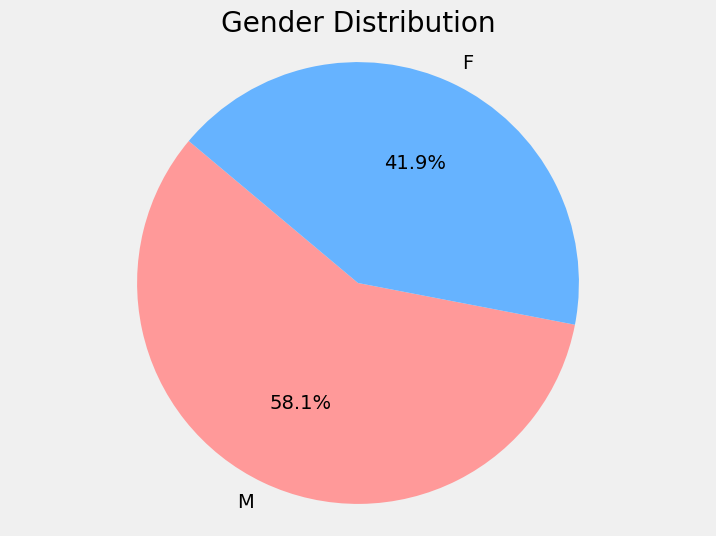

In [31]:
# Check distribution between Male and Female
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

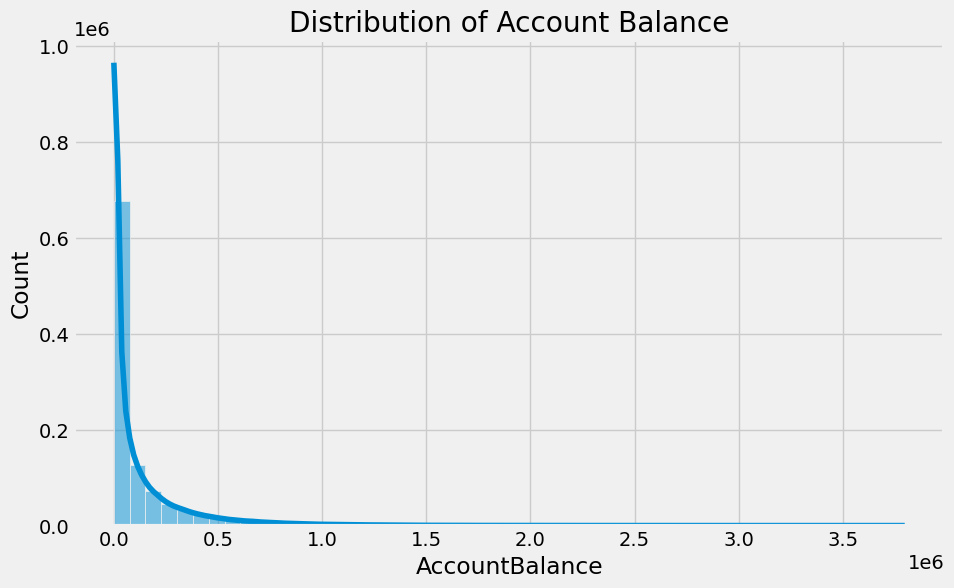

In [32]:
# Histogram for AccountBalance
plt.figure(figsize=(10, 6))
sns.histplot(df['AccountBalance'], bins=50, kde=True)
plt.title('Distribution of Account Balance')
plt.show()

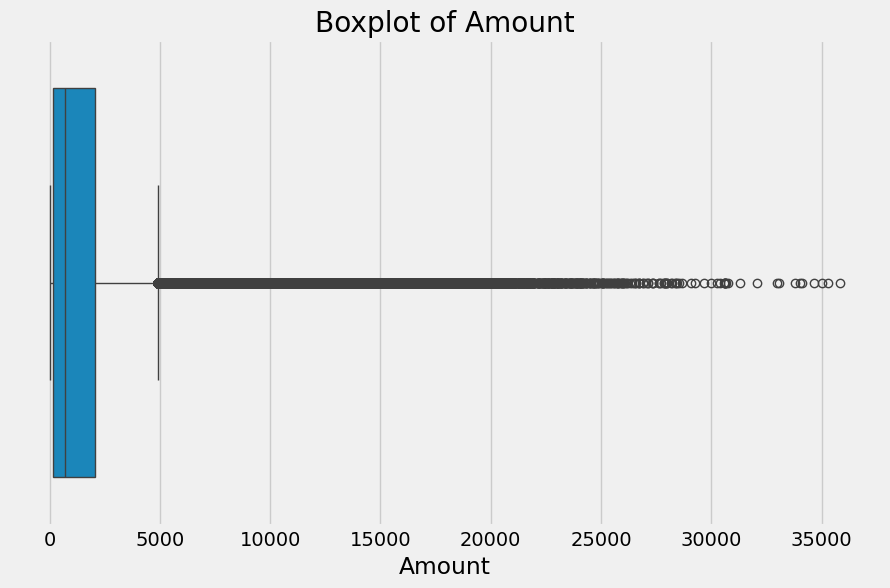

In [33]:
# Boxplot for Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Amount')
plt.show()


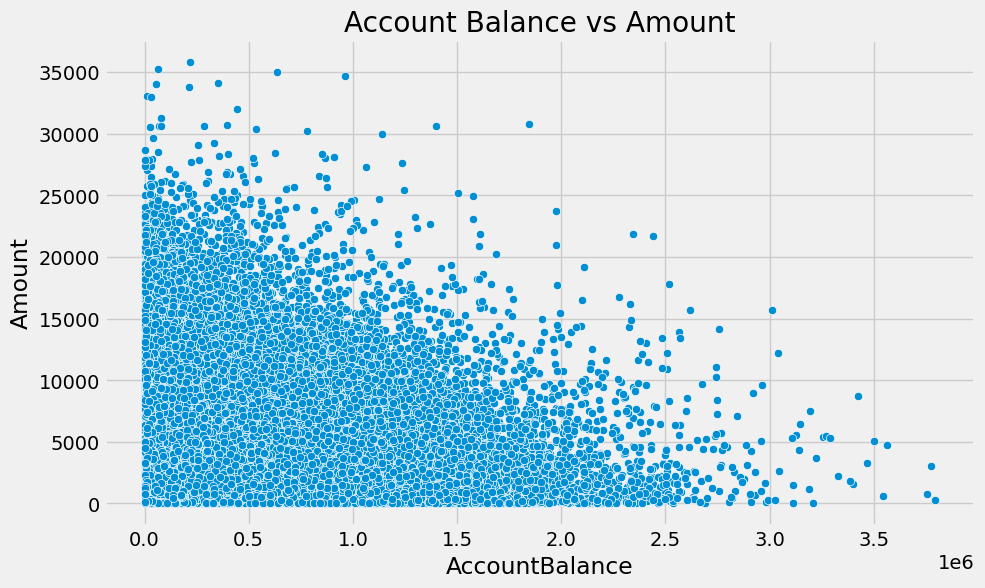

In [34]:
# Scatter plot of AccountBalance vs Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AccountBalance', y='Amount', data=df)
plt.title('Account Balance vs Amount')
plt.show()

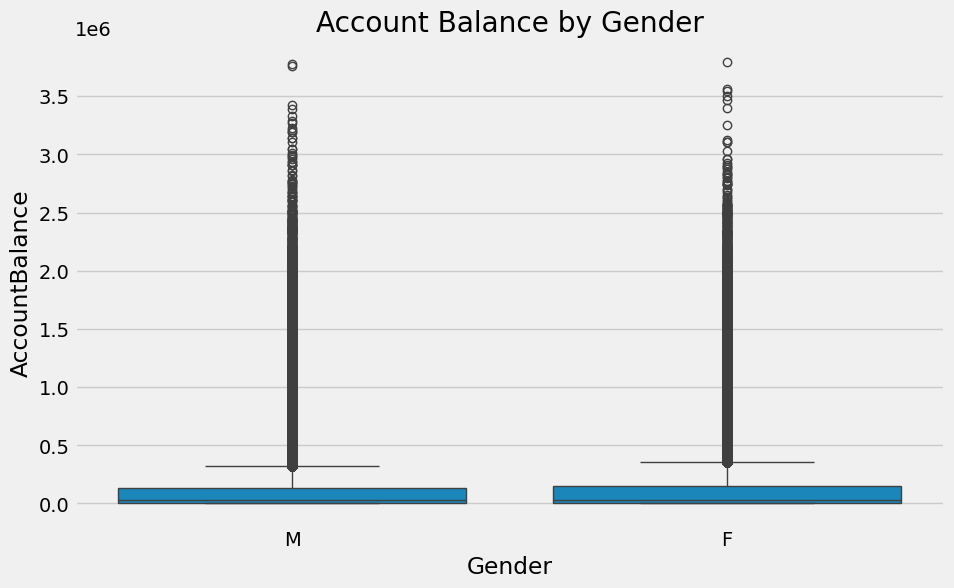

In [35]:
# Boxplot of AccountBalance by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='AccountBalance', data=df)
plt.title('Account Balance by Gender')
plt.show()

Check Average Account Balance and Spending

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/2623128727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['Date'].dt.to_period('M')


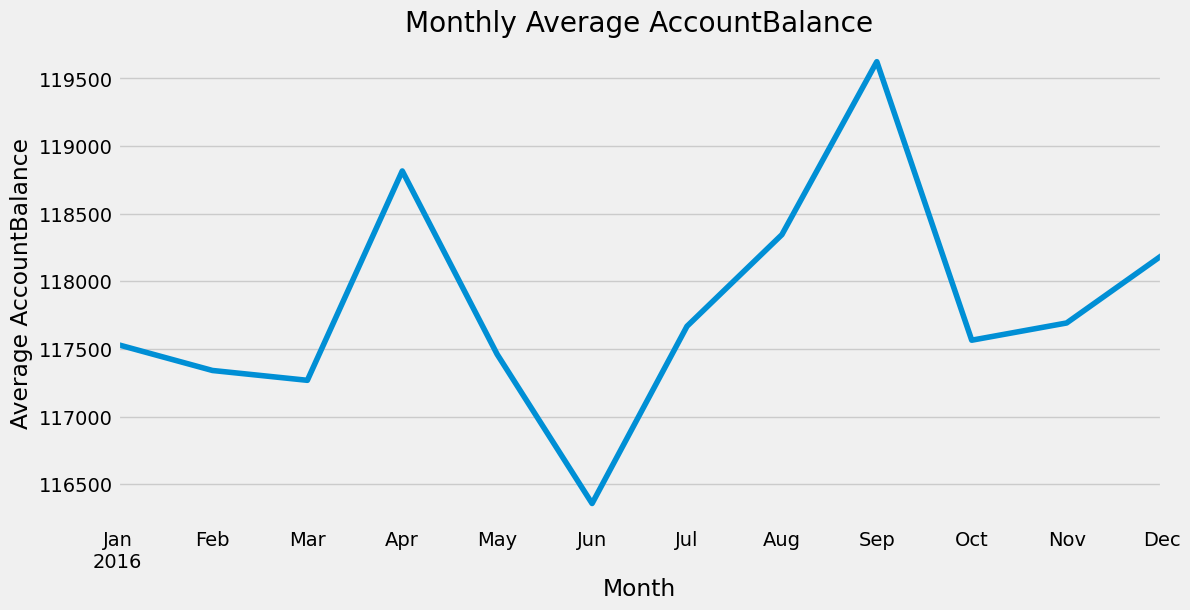

In [36]:
# Plotting trends over time for a numerical column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Aggregating data by YearMonth
monthly_data = df.groupby('YearMonth')['AccountBalance'].mean()

plt.figure(figsize=(12, 6))
monthly_data.plot()
plt.title('Monthly Average AccountBalance')
plt.xlabel('Month')
plt.ylabel('Average AccountBalance')
plt.show()

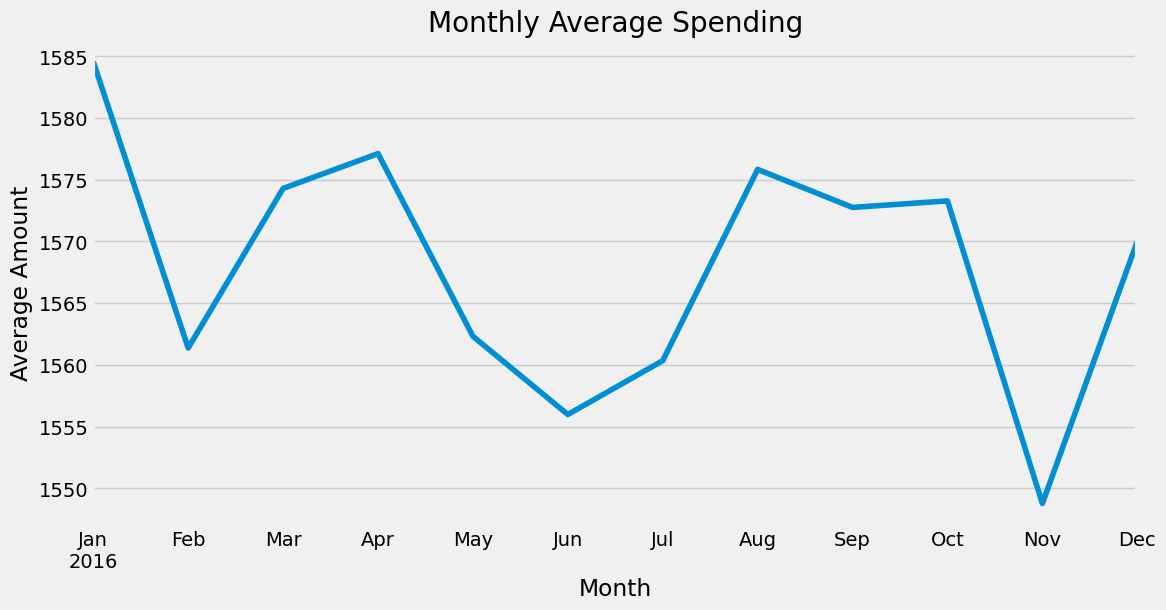

In [37]:
monthly_data = df.groupby('YearMonth')['Amount'].mean()

plt.figure(figsize=(12, 6))
monthly_data.plot()
plt.title('Monthly Average Spending')
plt.xlabel('Month')
plt.ylabel('Average Amount')
plt.show()

In [38]:
df

,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Amount,YearMonth
0,T815188,C4429479,1964-06-06,M,SECUNDERABAD,113492.404193,2016-12-09,1329.537997,2016-12
1,T447012,C5437542,1986-10-17,M,GANJAM,122888.497864,2016-08-17,907.299431,2016-08
2,T543943,C6223255,1979-09-21,M,MUMBAI,1.100255,2016-09-30,2292.010551,2016-09
3,T216520,C1236474,1994-06-23,F,BULADHANA,361.272904,2016-08-08,1321.733798,2016-08
4,T232075,C6769961,1982-12-13,F,CHAMPARAN MOTIHARI,6487.068577,2016-08-23,118.242970,2016-08
...,...,...,...,...,...,...,...,...,...
1048562,T522748,C5417315,1966-08-08,M,GURGAON,57819.257179,2016-08-31,1119.933560,2016-08
1048563,T211546,C7827586,1991-06-05,F,DIST RAIGAD PANVEL,173984.507491,2016-10-21,656.627214,2016-10
1048564,T886043,C5314662,1987-09-14,F,BOISAR,13.855252,2016-08-28,1218.263934,2016-08
1048565,T415693,C6937532,1982-07-15,F,CHAS BOKARO,2472.115344,2016-08-23,804.150409,2016-08


Adding New Features 

In [39]:
#Customer Age
df['Age'] = df['Date'].dt.year - df['DateOfBirth'].dt.year

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/3736671154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Date'].dt.year - df['DateOfBirth'].dt.year


In [40]:
df.describe()

,DateOfBirth,AccountBalance,Date,Amount,Age
count,1044970,1.044970e+06,1044970,1.044970e+06,1.044970e+06
mean,1981-06-10 01:17:35.729446656,1.183192e+05,2016-08-02 20:09:28.823220736,1.571735e+03,3.505223e+01
min,1924-02-02 00:00:00,0.000000e+00,2016-01-08 00:00:00,3.675698e-09,-7.000000e+00
25%,1975-03-20 00:00:00,3.012983e+03,2016-07-09 00:00:00,1.425838e+02,2.600000e+01
50%,1984-05-28 12:00:00,3.012973e+04,2016-08-24 00:00:00,6.836001e+02,3.200000e+01
75%,1990-08-01 00:00:00,1.368168e+05,2016-09-22 00:00:00,2.059070e+03,4.100000e+01
max,2023-06-08 00:00:00,3.796507e+06,2016-12-09 00:00:00,3.585288e+04,9.200000e+01
std,NaN,2.129370e+05,NaN,2.279649e+03,1.231398e+01


In [41]:
df[df['Age'] <0]

,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Amount,YearMonth,Age
954,T965526,C6614525,2021-01-19,F,HERITAGE HYDERABAD,7534.396609,2016-09-25,311.405517,2016-09,-5
1515,T487767,C7331881,2021-01-19,F,JAMSHEDPUR,67842.665442,2016-08-26,24.924051,2016-08,-5
1741,T498181,C4314123,2021-01-19,M,NAIGAON DADAR MUMBAI MUMBAI,7162.414196,2016-08-27,1606.532287,2016-08,-5
3752,T225642,C5985473,2021-01-19,M,MIDC MUMBAI,345542.810330,2016-05-08,710.365411,2016-05,-5
3819,T583243,C1631880,2021-01-19,M,GUNTUR,9613.699034,2016-10-09,166.159325,2016-10,-5
...,...,...,...,...,...,...,...,...,...,...
1025266,T327553,C1128590,2021-01-19,M,GRAM PANCHAYTH HYDERABAD,86.991610,2016-04-09,625.313345,2016-04,-5
1032488,T455162,C6732327,2021-01-19,M,GURU VILLA BUNGLOWS ANAND,5569.703674,2016-08-18,314.354552,2016-08,-5
1040109,T33265,C5626790,2019-12-15,F,KANCHEEPURAM TK AND DT,236733.983360,2016-03-08,356.827521,2016-03,-3
1040909,T393088,C3872886,2021-01-19,F,THANE (W),262845.248007,2016-09-27,1103.153369,2016-09,-5


In [42]:
#Again quite low number of data we can delete 

df = df[df['Age'] > 0]

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. 
It helps managers to identify potential customers to do more profitable business. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.

- **Recency (R):** Who have purchased recently? Number of days since last purchase (least recency)
- **Frequency (F):** Who has purchased frequently? It means the total number of purchases. ( high frequency)
- **Monetary Value(M):** Who have high purchase amount? It means the total money customer spent (high monetary value)


In [43]:
df['FirstTransaction'] = df['Date'] 
df['LastTransaction'] = df['Date']

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/4082174678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FirstTransaction'] = df['Date']
/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/4082174678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LastTransaction'] = df['Date']


In [44]:
df

,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Amount,YearMonth,Age,FirstTransaction,LastTransaction
0,T815188,C4429479,1964-06-06,M,SECUNDERABAD,113492.404193,2016-12-09,1329.537997,2016-12,52,2016-12-09,2016-12-09
1,T447012,C5437542,1986-10-17,M,GANJAM,122888.497864,2016-08-17,907.299431,2016-08,30,2016-08-17,2016-08-17
2,T543943,C6223255,1979-09-21,M,MUMBAI,1.100255,2016-09-30,2292.010551,2016-09,37,2016-09-30,2016-09-30
3,T216520,C1236474,1994-06-23,F,BULADHANA,361.272904,2016-08-08,1321.733798,2016-08,22,2016-08-08,2016-08-08
4,T232075,C6769961,1982-12-13,F,CHAMPARAN MOTIHARI,6487.068577,2016-08-23,118.242970,2016-08,34,2016-08-23,2016-08-23
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T522748,C5417315,1966-08-08,M,GURGAON,57819.257179,2016-08-31,1119.933560,2016-08,50,2016-08-31,2016-08-31
1048563,T211546,C7827586,1991-06-05,F,DIST RAIGAD PANVEL,173984.507491,2016-10-21,656.627214,2016-10,25,2016-10-21,2016-10-21
1048564,T886043,C5314662,1987-09-14,F,BOISAR,13.855252,2016-08-28,1218.263934,2016-08,29,2016-08-28,2016-08-28
1048565,T415693,C6937532,1982-07-15,F,CHAS BOKARO,2472.115344,2016-08-23,804.150409,2016-08,34,2016-08-23,2016-08-23


In [45]:
df['Monetary'] = df['Amount']

df

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/3029822397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monetary'] = df['Amount']


,ID,CustomerID,DateOfBirth,Gender,Location,AccountBalance,Date,Amount,YearMonth,Age,FirstTransaction,LastTransaction,Monetary
0,T815188,C4429479,1964-06-06,M,SECUNDERABAD,113492.404193,2016-12-09,1329.537997,2016-12,52,2016-12-09,2016-12-09,1329.537997
1,T447012,C5437542,1986-10-17,M,GANJAM,122888.497864,2016-08-17,907.299431,2016-08,30,2016-08-17,2016-08-17,907.299431
2,T543943,C6223255,1979-09-21,M,MUMBAI,1.100255,2016-09-30,2292.010551,2016-09,37,2016-09-30,2016-09-30,2292.010551
3,T216520,C1236474,1994-06-23,F,BULADHANA,361.272904,2016-08-08,1321.733798,2016-08,22,2016-08-08,2016-08-08,1321.733798
4,T232075,C6769961,1982-12-13,F,CHAMPARAN MOTIHARI,6487.068577,2016-08-23,118.242970,2016-08,34,2016-08-23,2016-08-23,118.242970
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T522748,C5417315,1966-08-08,M,GURGAON,57819.257179,2016-08-31,1119.933560,2016-08,50,2016-08-31,2016-08-31,1119.933560
1048563,T211546,C7827586,1991-06-05,F,DIST RAIGAD PANVEL,173984.507491,2016-10-21,656.627214,2016-10,25,2016-10-21,2016-10-21,656.627214
1048564,T886043,C5314662,1987-09-14,F,BOISAR,13.855252,2016-08-28,1218.263934,2016-08,29,2016-08-28,2016-08-28,1218.263934
1048565,T415693,C6937532,1982-07-15,F,CHAS BOKARO,2472.115344,2016-08-23,804.150409,2016-08,34,2016-08-23,2016-08-23,804.150409


Creating dataframe for RMF analysis

In [46]:
RMF_df = df.groupby('CustomerID').agg({
    'ID' :'count',
    'Gender': 'first',
    'Location': 'first',
    'AccountBalance':'mean',
    'Amount':'mean',
    'Age':'mean',
    'FirstTransaction':'min',
    'LastTransaction':'max',
    'Date':'median',
    'Monetary':'sum'
})

RMF_df = RMF_df.reset_index()
RMF_df

,CustomerID,ID,Gender,Location,AccountBalance,Amount,Age,FirstTransaction,LastTransaction,Date,Monetary
0,C1010012,2,M,SHAHJAHANPUR,6450.655563,1159.931674,22.000000,2016-06-08,2016-08-20,2016-07-14 12:00:00,2319.863349
1,C1010014,1,F,MOHALI,720.903967,3594.994746,40.000000,2016-08-08,2016-08-08,2016-08-08 00:00:00,3594.994746
2,C1010018,2,F,KERALA,176402.454310,432.112596,41.500000,2016-08-16,2016-09-13,2016-08-30 00:00:00,864.225192
3,C1010024,2,F,JAMSHEDPUR,12744.168327,1424.531438,43.000000,2016-08-15,2016-08-15,2016-08-15 00:00:00,2849.062877
4,C1010028,2,M,NOIDA,76317.522732,1665.935967,23.500000,2016-05-09,2016-10-21,2016-07-30 12:00:00,3331.871933
...,...,...,...,...,...,...,...,...,...,...,...
611506,C9099832,3,M,ALLAHABAD,288247.481670,3202.945088,30.333333,2016-08-23,2016-11-09,2016-08-28 00:00:00,9608.835265
611507,C9099877,1,F,JAMSHEDPUR,12229.583001,111.961052,35.000000,2016-09-14,2016-09-14,2016-09-14 00:00:00,111.961052
611508,C9099919,3,M,JAMSHEDPUR,29220.988442,363.725224,45.000000,2016-08-20,2016-09-23,2016-08-27 00:00:00,1091.175673
611509,C9099941,2,M,WAYS PANCHKUVA AHMEDABAD,59771.534843,1719.934283,25.500000,2016-08-16,2016-09-27,2016-09-06 00:00:00,3439.868566


In [47]:
#Since we count ID we can call as Frequency
RMF_df.rename(columns={'ID':'Frequency'}, inplace=True)

In [48]:
RMF_df['Recency'] = RMF_df['LastTransaction'] - RMF_df['FirstTransaction']

In [49]:
RMF_df

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,FirstTransaction,LastTransaction,Date,Monetary,Recency
0,C1010012,2,M,SHAHJAHANPUR,6450.655563,1159.931674,22.000000,2016-06-08,2016-08-20,2016-07-14 12:00:00,2319.863349,73 days
1,C1010014,1,F,MOHALI,720.903967,3594.994746,40.000000,2016-08-08,2016-08-08,2016-08-08 00:00:00,3594.994746,0 days
2,C1010018,2,F,KERALA,176402.454310,432.112596,41.500000,2016-08-16,2016-09-13,2016-08-30 00:00:00,864.225192,28 days
3,C1010024,2,F,JAMSHEDPUR,12744.168327,1424.531438,43.000000,2016-08-15,2016-08-15,2016-08-15 00:00:00,2849.062877,0 days
4,C1010028,2,M,NOIDA,76317.522732,1665.935967,23.500000,2016-05-09,2016-10-21,2016-07-30 12:00:00,3331.871933,165 days
...,...,...,...,...,...,...,...,...,...,...,...,...
611506,C9099832,3,M,ALLAHABAD,288247.481670,3202.945088,30.333333,2016-08-23,2016-11-09,2016-08-28 00:00:00,9608.835265,78 days
611507,C9099877,1,F,JAMSHEDPUR,12229.583001,111.961052,35.000000,2016-09-14,2016-09-14,2016-09-14 00:00:00,111.961052,0 days
611508,C9099919,3,M,JAMSHEDPUR,29220.988442,363.725224,45.000000,2016-08-20,2016-09-23,2016-08-27 00:00:00,1091.175673,34 days
611509,C9099941,2,M,WAYS PANCHKUVA AHMEDABAD,59771.534843,1719.934283,25.500000,2016-08-16,2016-09-27,2016-09-06 00:00:00,3439.868566,42 days


In [50]:
#Remove days string
RMF_df['Recency'] = RMF_df['Recency'].astype(str)

RMF_df['Recency'] = RMF_df['Recency'].apply(lambda x: re.search('\d+',x).group())
RMF_df['Recency'] = RMF_df['Recency'].astype(int)

In [51]:
RMF_df

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,FirstTransaction,LastTransaction,Date,Monetary,Recency
0,C1010012,2,M,SHAHJAHANPUR,6450.655563,1159.931674,22.000000,2016-06-08,2016-08-20,2016-07-14 12:00:00,2319.863349,73
1,C1010014,1,F,MOHALI,720.903967,3594.994746,40.000000,2016-08-08,2016-08-08,2016-08-08 00:00:00,3594.994746,0
2,C1010018,2,F,KERALA,176402.454310,432.112596,41.500000,2016-08-16,2016-09-13,2016-08-30 00:00:00,864.225192,28
3,C1010024,2,F,JAMSHEDPUR,12744.168327,1424.531438,43.000000,2016-08-15,2016-08-15,2016-08-15 00:00:00,2849.062877,0
4,C1010028,2,M,NOIDA,76317.522732,1665.935967,23.500000,2016-05-09,2016-10-21,2016-07-30 12:00:00,3331.871933,165
...,...,...,...,...,...,...,...,...,...,...,...,...
611506,C9099832,3,M,ALLAHABAD,288247.481670,3202.945088,30.333333,2016-08-23,2016-11-09,2016-08-28 00:00:00,9608.835265,78
611507,C9099877,1,F,JAMSHEDPUR,12229.583001,111.961052,35.000000,2016-09-14,2016-09-14,2016-09-14 00:00:00,111.961052,0
611508,C9099919,3,M,JAMSHEDPUR,29220.988442,363.725224,45.000000,2016-08-20,2016-09-23,2016-08-27 00:00:00,1091.175673,34
611509,C9099941,2,M,WAYS PANCHKUVA AHMEDABAD,59771.534843,1719.934283,25.500000,2016-08-16,2016-09-27,2016-09-06 00:00:00,3439.868566,42


There are some data written as 0 which say there are only 1 transaction happened, we can change with 1 

In [52]:
def change_zero(i):
    if i==0:
        return 1
    else:
        return i
    
RMF_df['Recency'] = RMF_df['Recency'].apply(change_zero)

In [53]:
RMF_df

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,FirstTransaction,LastTransaction,Date,Monetary,Recency
0,C1010012,2,M,SHAHJAHANPUR,6450.655563,1159.931674,22.000000,2016-06-08,2016-08-20,2016-07-14 12:00:00,2319.863349,73
1,C1010014,1,F,MOHALI,720.903967,3594.994746,40.000000,2016-08-08,2016-08-08,2016-08-08 00:00:00,3594.994746,1
2,C1010018,2,F,KERALA,176402.454310,432.112596,41.500000,2016-08-16,2016-09-13,2016-08-30 00:00:00,864.225192,28
3,C1010024,2,F,JAMSHEDPUR,12744.168327,1424.531438,43.000000,2016-08-15,2016-08-15,2016-08-15 00:00:00,2849.062877,1
4,C1010028,2,M,NOIDA,76317.522732,1665.935967,23.500000,2016-05-09,2016-10-21,2016-07-30 12:00:00,3331.871933,165
...,...,...,...,...,...,...,...,...,...,...,...,...
611506,C9099832,3,M,ALLAHABAD,288247.481670,3202.945088,30.333333,2016-08-23,2016-11-09,2016-08-28 00:00:00,9608.835265,78
611507,C9099877,1,F,JAMSHEDPUR,12229.583001,111.961052,35.000000,2016-09-14,2016-09-14,2016-09-14 00:00:00,111.961052,1
611508,C9099919,3,M,JAMSHEDPUR,29220.988442,363.725224,45.000000,2016-08-20,2016-09-23,2016-08-27 00:00:00,1091.175673,34
611509,C9099941,2,M,WAYS PANCHKUVA AHMEDABAD,59771.534843,1719.934283,25.500000,2016-08-16,2016-09-27,2016-09-06 00:00:00,3439.868566,42


In [54]:
# After getting Recency column we dont need FirstTransaction and LastTransaction columns anymore
RMF_df.drop(columns=['FirstTransaction','LastTransaction'], inplace=True)

In [55]:
RMF_df

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,Date,Monetary,Recency
0,C1010012,2,M,SHAHJAHANPUR,6450.655563,1159.931674,22.000000,2016-07-14 12:00:00,2319.863349,73
1,C1010014,1,F,MOHALI,720.903967,3594.994746,40.000000,2016-08-08 00:00:00,3594.994746,1
2,C1010018,2,F,KERALA,176402.454310,432.112596,41.500000,2016-08-30 00:00:00,864.225192,28
3,C1010024,2,F,JAMSHEDPUR,12744.168327,1424.531438,43.000000,2016-08-15 00:00:00,2849.062877,1
4,C1010028,2,M,NOIDA,76317.522732,1665.935967,23.500000,2016-07-30 12:00:00,3331.871933,165
...,...,...,...,...,...,...,...,...,...,...
611506,C9099832,3,M,ALLAHABAD,288247.481670,3202.945088,30.333333,2016-08-28 00:00:00,9608.835265,78
611507,C9099877,1,F,JAMSHEDPUR,12229.583001,111.961052,35.000000,2016-09-14 00:00:00,111.961052,1
611508,C9099919,3,M,JAMSHEDPUR,29220.988442,363.725224,45.000000,2016-08-27 00:00:00,1091.175673,34
611509,C9099941,2,M,WAYS PANCHKUVA AHMEDABAD,59771.534843,1719.934283,25.500000,2016-09-06 00:00:00,3439.868566,42


In [56]:
RMF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611511 entries, 0 to 611510
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CustomerID      611511 non-null  object        
 1   Frequency       611511 non-null  int64         
 2   Gender          611511 non-null  object        
 3   Location        611511 non-null  object        
 4   AccountBalance  611511 non-null  float64       
 5   Amount          611511 non-null  float64       
 6   Age             611511 non-null  float64       
 7   Date            611511 non-null  datetime64[ns]
 8   Monetary        611511 non-null  float64       
 9   Recency         611511 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 46.7+ MB


In [57]:
RMF_df

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,Date,Monetary,Recency
0,C1010012,2,M,SHAHJAHANPUR,6450.655563,1159.931674,22.000000,2016-07-14 12:00:00,2319.863349,73
1,C1010014,1,F,MOHALI,720.903967,3594.994746,40.000000,2016-08-08 00:00:00,3594.994746,1
2,C1010018,2,F,KERALA,176402.454310,432.112596,41.500000,2016-08-30 00:00:00,864.225192,28
3,C1010024,2,F,JAMSHEDPUR,12744.168327,1424.531438,43.000000,2016-08-15 00:00:00,2849.062877,1
4,C1010028,2,M,NOIDA,76317.522732,1665.935967,23.500000,2016-07-30 12:00:00,3331.871933,165
...,...,...,...,...,...,...,...,...,...,...
611506,C9099832,3,M,ALLAHABAD,288247.481670,3202.945088,30.333333,2016-08-28 00:00:00,9608.835265,78
611507,C9099877,1,F,JAMSHEDPUR,12229.583001,111.961052,35.000000,2016-09-14 00:00:00,111.961052,1
611508,C9099919,3,M,JAMSHEDPUR,29220.988442,363.725224,45.000000,2016-08-27 00:00:00,1091.175673,34
611509,C9099941,2,M,WAYS PANCHKUVA AHMEDABAD,59771.534843,1719.934283,25.500000,2016-09-06 00:00:00,3439.868566,42


Calculating highest and lowest monetary customers

In [130]:
RMF_df['Monetary'].max()

48664.37958154033

In [132]:
RMF_df[RMF_df['Monetary'] == 48664.37958154033]

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,Date,Monetary,Recency,R_rank_norm,F_rank_norm,M_rank_norm,RMF_Score,Customer_segment
576603,C8626085,5,F,CORPORATION BANK KOLKATA,254823.426708,9732.875916,25.8,2016-09-09,48664.379582,159,16.121909,99.351524,100.0,4.36,Platinum


In [131]:
RMF_df['Monetary'].min()

1.3078736068510148e-08

In [133]:
RMF_df[RMF_df['Monetary'] == 1.3078736068510148e-08]

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,Date,Monetary,Recency,R_rank_norm,F_rank_norm,M_rank_norm,RMF_Score,Customer_segment
181895,C3414643,1,M,JAMSHEDPUR,6942.15099,1.307874e-08,48.0,2016-08-22,1.307874e-08,1,100.0,26.096036,0.000164,1.12,Bronze


Most Recent customer

In [135]:
RMF_df['Recency'].max()

336

In [136]:
RMF_df[RMF_df['Recency'] == 336]

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,Date,Monetary,Recency,R_rank_norm,F_rank_norm,M_rank_norm,RMF_Score,Customer_segment
318649,C5220158,3,F,MUMBAI,153872.968584,1141.803678,34.333333,2016-01-09 00:00:00,3425.411034,336,0.007727,89.158485,72.511206,3.31,Gold
296346,C4921345,3,F,LONDON,46696.642548,465.108751,37.333333,2016-02-08 00:00:00,1395.326252,336,0.007727,89.158485,48.287929,2.62,Silver
331034,C5368590,3,M,JHAJJAR,102370.703097,127.040344,28.666667,2016-02-09 00:00:00,381.121033,336,0.007727,89.158485,24.590236,1.95,Bronze
308706,C5077567,3,M,JAMSHEDPUR,66906.900109,550.494298,28.666667,2016-04-08 00:00:00,1651.482895,336,0.007727,89.158485,52.506496,2.74,Silver
100169,C2321190,3,M,BANGALORE,6347.454336,1032.970507,27.333333,2016-04-08 00:00:00,3098.911520,336,0.007727,89.158485,69.668084,3.23,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419492,C6535232,3,F,ITANAGAR,154867.994389,1439.549979,34.666667,2016-09-23 00:00:00,4318.649936,336,0.007727,89.158485,78.810684,3.49,Gold
64155,C1830247,3,F,MUMBAI,32238.155449,655.237072,62.000000,2016-09-27 00:00:00,1965.711215,336,0.007727,89.158485,57.012548,2.87,Silver
492393,C7520033,3,M,GRAM PANCHAYTH HYDERABAD,7628.115298,273.100214,24.666667,2016-10-16 00:00:00,819.300641,336,0.007727,89.158485,36.743738,2.30,Silver
273405,C4619166,3,M,JAMSHEDPUR,169.587195,323.355948,26.666667,2016-10-21 00:00:00,970.067845,336,0.007727,89.158485,40.097725,2.39,Silver


Frequency distribution

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/1974155420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Frequency',data=RMF_df,palette='viridis', order = RMF_df['Frequency'].value_counts().index)


Text(0.5, 1.0, 'Frequency')

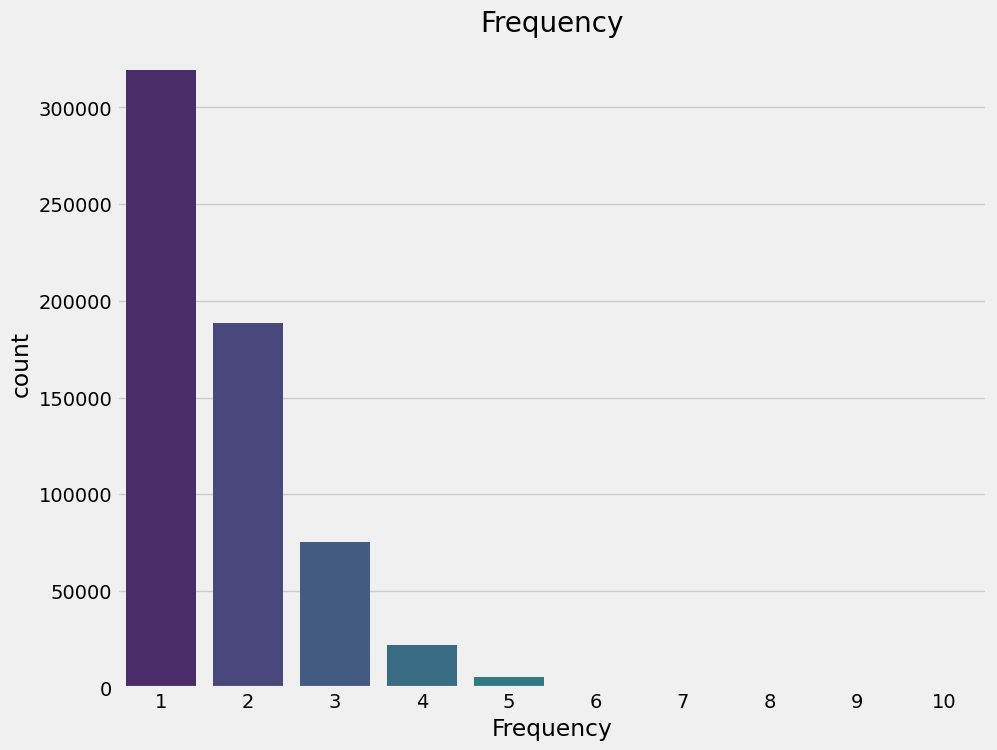

In [58]:
plt.figure(figsize=(10,8))

sns.countplot(x='Frequency',data=RMF_df,palette='viridis', order = RMF_df['Frequency'].value_counts().index)
plt.title("Frequency",
          fontsize='20')

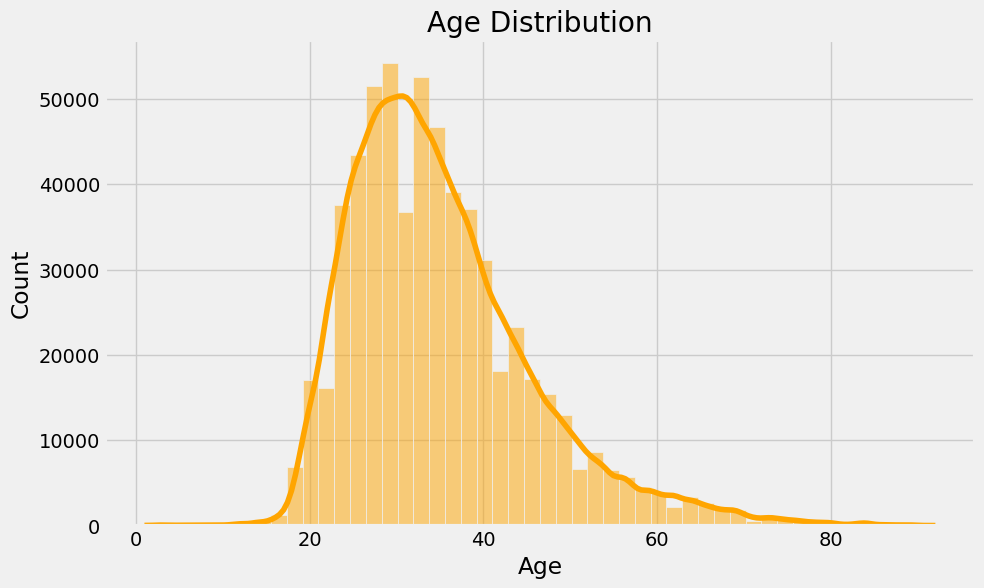

In [59]:
plt.figure(figsize=(10,6))
sns.histplot(data=RMF_df, x=RMF_df['Age'], bins=50, kde=True, color='orange')
plt.title('Age Distribution')
plt.show()

Location with the highest number of customer

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/3601377388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.countplot(y='Location',data=RMF_df,palette='viridis', order = RMF_df['Location'].value_counts()[:20].index)


Text(0.5, 1.0, 'Most 20 Location of Customer ')

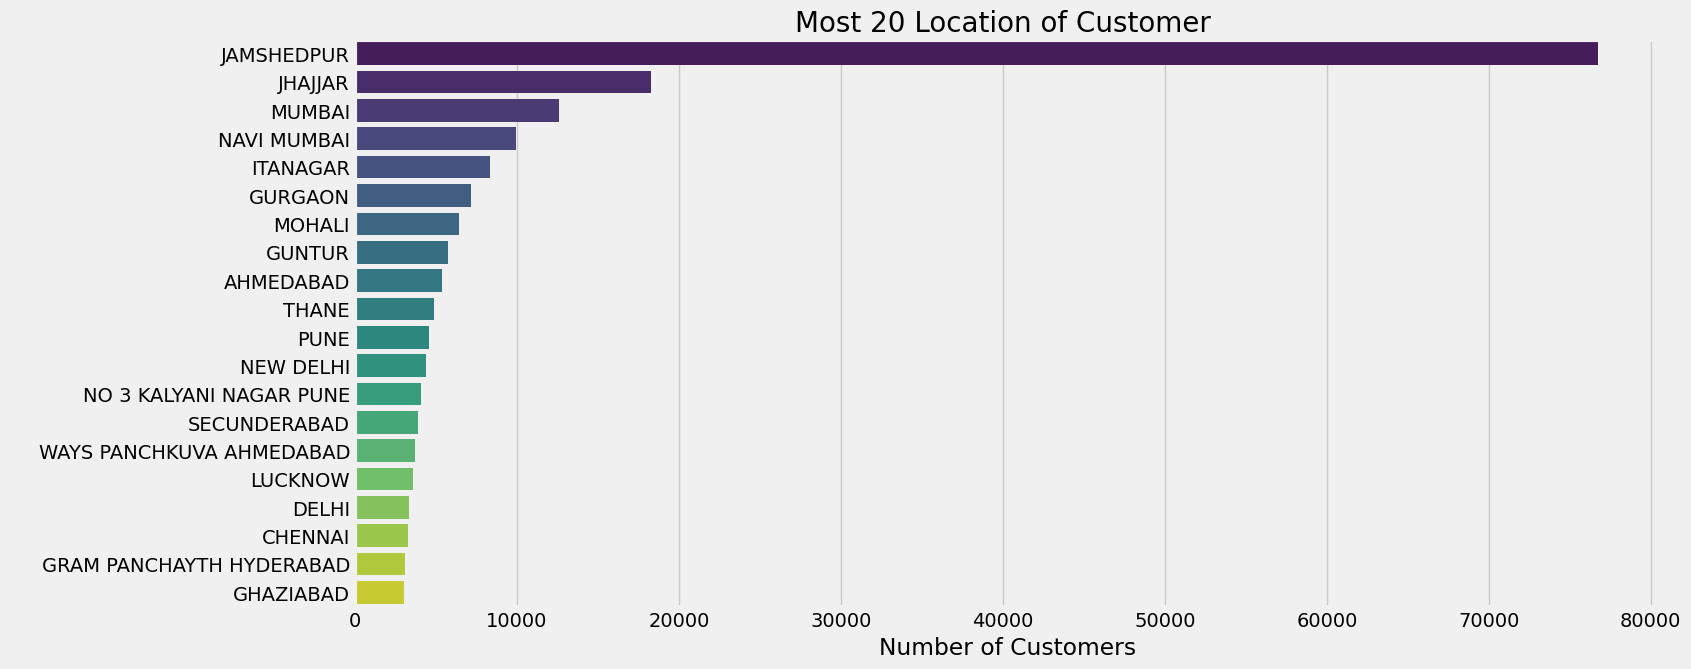

In [60]:
plt.figure(figsize=(15,7))
chart=sns.countplot(y='Location',data=RMF_df,palette='viridis', order = RMF_df['Location'].value_counts()[:20].index)
plt.ylabel(' ')
plt.xlabel('Number of Customers')
plt.title("Most 20 Location of Customer ",
          fontsize='20')

In [62]:
RMF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611511 entries, 0 to 611510
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CustomerID      611511 non-null  object        
 1   Frequency       611511 non-null  int64         
 2   Gender          611511 non-null  object        
 3   Location        611511 non-null  object        
 4   AccountBalance  611511 non-null  float64       
 5   Amount          611511 non-null  float64       
 6   Age             611511 non-null  float64       
 7   Date            611511 non-null  datetime64[ns]
 8   Monetary        611511 non-null  float64       
 9   Recency         611511 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 46.7+ MB


Filter data as monthly to get more information

In [63]:
RMF_df['Date'] = pd.to_datetime(RMF_df['Date'])

RMF_df = RMF_df.sort_values(by='Date')
numeric_columns = RMF_df.select_dtypes(include='number').columns #To be able to select only numeric columns
month_grp_RMF = RMF_df.groupby([pd.Grouper(key='Date', freq='M')])[numeric_columns].mean()

month_grp_RMF

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/3501173157.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_grp_RMF = RMF_df.groupby([pd.Grouper(key='Date', freq='M')])[numeric_columns].mean()


,Frequency,AccountBalance,Amount,Age,Monetary,Recency
Date,,,,,,
2016-01-31,1.185400,116516.015031,1578.519706,35.065611,1872.926001,10.396241
2016-02-29,1.461074,120282.540603,1573.935956,35.161139,2308.135850,28.968387
2016-03-31,1.497019,117450.258433,1566.238867,35.046198,2353.925762,41.644944
2016-04-30,1.609511,118346.858436,1572.283217,35.063824,2533.163394,72.530529
2016-05-31,1.803990,119442.305698,1571.693615,35.043865,2842.172606,124.274169
2016-06-30,1.865504,117483.858948,1561.412866,35.077830,2919.196494,114.163269
2016-07-31,1.902314,118124.876130,1557.779295,35.061560,2960.719213,86.971208
2016-08-31,1.772416,118583.240741,1575.461777,35.065844,2788.676133,36.029044
2016-09-30,1.748595,118782.818348,1571.928745,35.088082,2748.039495,30.728367


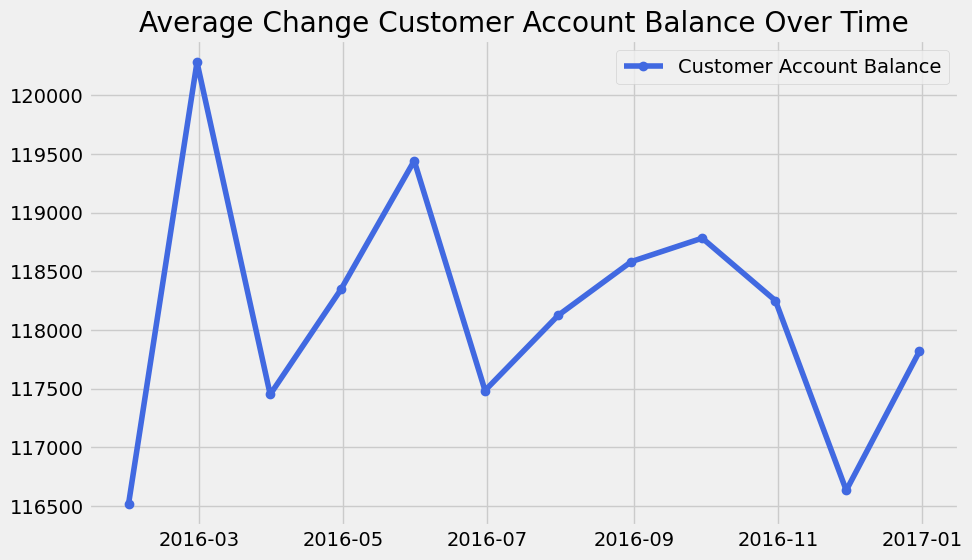

In [64]:
plt.figure(figsize=(10, 6))

plt.plot(month_grp_RMF.index, month_grp_RMF['AccountBalance'], color='royalblue', marker='o', label='Customer Account Balance')
plt.title('Average Change Customer Account Balance Over Time')

plt.legend()
plt.show()

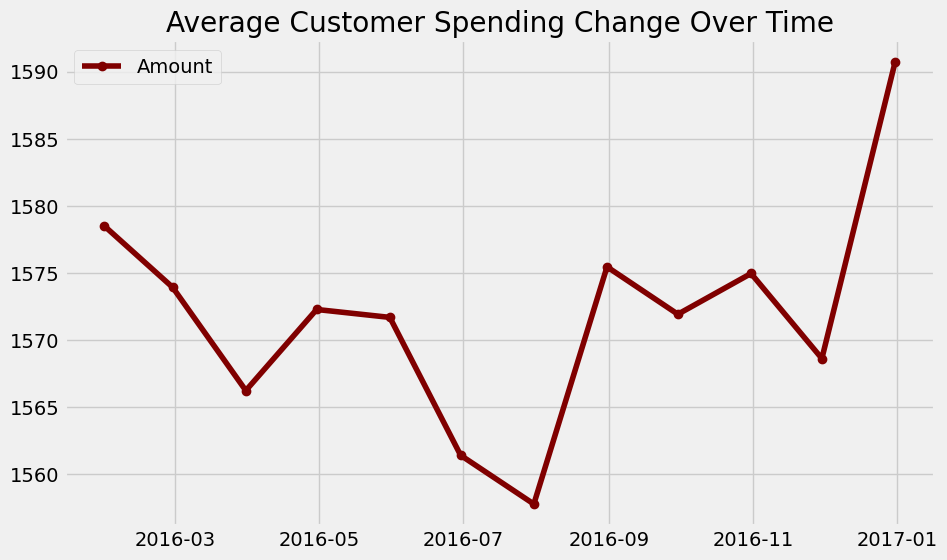

In [65]:
plt.figure(figsize=(10, 6))

plt.plot(month_grp_RMF.index, month_grp_RMF['Amount'], color='maroon', marker='o', label='Amount')
plt.title('Average Customer Spending Change Over Time')

plt.legend()
plt.show()

In [66]:
RMF_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611511 entries, 269975 to 586834
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CustomerID      611511 non-null  object        
 1   Frequency       611511 non-null  int64         
 2   Gender          611511 non-null  object        
 3   Location        611511 non-null  object        
 4   AccountBalance  611511 non-null  float64       
 5   Amount          611511 non-null  float64       
 6   Age             611511 non-null  float64       
 7   Date            611511 non-null  datetime64[ns]
 8   Monetary        611511 non-null  float64       
 9   Recency         611511 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 51.3+ MB


In [67]:
RMF_df

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,Date,Monetary,Recency
269975,C4540712,1,M,THANE,62640.726626,107.983150,63.0,2016-01-08,107.983150,1
41987,C1532436,1,M,JAMSHEDPUR,107938.377031,1559.982222,42.0,2016-01-08,1559.982222,1
101929,C2330354,1,M,GOREGAON (E) MUMBAI,12863.051418,618.946570,49.0,2016-01-08,618.946570,1
374115,C5934625,1,M,LIMITED BILASPUR,0.521206,3.809890,26.0,2016-01-08,3.809890,1
274191,C4623133,1,M,JAMSHEDPUR,13428.141099,532.192860,20.0,2016-01-08,532.192860,1
...,...,...,...,...,...,...,...,...,...,...
38019,C1511449,1,M,AMBALA,1.900156,10238.683503,24.0,2016-12-09,10238.683503,1
557374,C8361933,1,F,KADAPA,23467.093556,317.169076,28.0,2016-12-09,317.169076,1
182870,C3419860,1,F,GURGAON,16437.782930,2511.170533,33.0,2016-12-09,2511.170533,1
347093,C5611237,1,M,JOUNK)DISTT PAURI GARHWAL RISHIKESH,7422.441683,760.031176,37.0,2016-12-09,760.031176,1


We now have Recency, Monetary and Frequency 

In [68]:
RMF_df['R_rank'] = RMF_df['Recency'].rank(ascending=False)
RMF_df['F_rank'] = RMF_df['Frequency'].rank(ascending=True)
RMF_df['M_rank'] = RMF_df['Monetary'].rank(ascending=True)

RMF_df

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,Date,Monetary,Recency,R_rank,F_rank,M_rank
269975,C4540712,1,M,THANE,62640.726626,107.983150,63.0,2016-01-08,107.983150,1,446498.0,159580.0,77932.0
41987,C1532436,1,M,JAMSHEDPUR,107938.377031,1559.982222,42.0,2016-01-08,1559.982222,1,446498.0,159580.0,312169.0
101929,C2330354,1,M,GOREGAON (E) MUMBAI,12863.051418,618.946570,49.0,2016-01-08,618.946570,1,446498.0,159580.0,194163.0
374115,C5934625,1,M,LIMITED BILASPUR,0.521206,3.809890,26.0,2016-01-08,3.809890,1,446498.0,159580.0,14942.0
274191,C4623133,1,M,JAMSHEDPUR,13428.141099,532.192860,20.0,2016-01-08,532.192860,1,446498.0,159580.0,179363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38019,C1511449,1,M,AMBALA,1.900156,10238.683503,24.0,2016-12-09,10238.683503,1,446498.0,159580.0,587435.0
557374,C8361933,1,F,KADAPA,23467.093556,317.169076,28.0,2016-12-09,317.169076,1,446498.0,159580.0,136480.0
182870,C3419860,1,F,GURGAON,16437.782930,2511.170533,33.0,2016-12-09,2511.170533,1,446498.0,159580.0,389641.0
347093,C5611237,1,M,JOUNK)DISTT PAURI GARHWAL RISHIKESH,7422.441683,760.031176,37.0,2016-12-09,760.031176,1,446498.0,159580.0,216026.0


In [69]:
#Normalize the Rank columns
RMF_df['R_rank_norm'] = (RMF_df['R_rank']/RMF_df['R_rank'].max())*100
RMF_df['F_rank_norm'] = (RMF_df['F_rank']/RMF_df['F_rank'].max())*100
RMF_df['M_rank_norm'] = (RMF_df['M_rank']/RMF_df['M_rank'].max())*100

#Drop 
RMF_df.drop(['R_rank','F_rank','M_rank'],axis=1, inplace=True)

RMF_df

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,Date,Monetary,Recency,R_rank_norm,F_rank_norm,M_rank_norm
269975,C4540712,1,M,THANE,62640.726626,107.983150,63.0,2016-01-08,107.983150,1,100.0,26.096036,12.744170
41987,C1532436,1,M,JAMSHEDPUR,107938.377031,1559.982222,42.0,2016-01-08,1559.982222,1,100.0,26.096036,51.048796
101929,C2330354,1,M,GOREGAON (E) MUMBAI,12863.051418,618.946570,49.0,2016-01-08,618.946570,1,100.0,26.096036,31.751350
374115,C5934625,1,M,LIMITED BILASPUR,0.521206,3.809890,26.0,2016-01-08,3.809890,1,100.0,26.096036,2.443456
274191,C4623133,1,M,JAMSHEDPUR,13428.141099,532.192860,20.0,2016-01-08,532.192860,1,100.0,26.096036,29.331116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38019,C1511449,1,M,AMBALA,1.900156,10238.683503,24.0,2016-12-09,10238.683503,1,100.0,26.096036,96.062867
557374,C8361933,1,F,KADAPA,23467.093556,317.169076,28.0,2016-12-09,317.169076,1,100.0,26.096036,22.318487
182870,C3419860,1,F,GURGAON,16437.782930,2511.170533,33.0,2016-12-09,2511.170533,1,100.0,26.096036,63.717742
347093,C5611237,1,M,JOUNK)DISTT PAURI GARHWAL RISHIKESH,7422.441683,760.031176,37.0,2016-12-09,760.031176,1,100.0,26.096036,35.326593


Formula for RFM Calculation:

$$
0.15 \times \text{Recency score} + 0.28 \times \text{Frequency score} + 0.57 \times \text{Monetary score}
$$

We rate them on a scale of 5

In [70]:
RMF_df['RMF_Score'] = 0.15*RMF_df['R_rank_norm'] + 0.28*RMF_df['F_rank_norm'] + 0.57*RMF_df['M_rank_norm']

RMF_df['RMF_Score'] *= 0.05

RMF_df['RMF_Score'] = RMF_df['RMF_Score'].round(2)

RMF_df

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,Date,Monetary,Recency,R_rank_norm,F_rank_norm,M_rank_norm,RMF_Score
269975,C4540712,1,M,THANE,62640.726626,107.983150,63.0,2016-01-08,107.983150,1,100.0,26.096036,12.744170,1.48
41987,C1532436,1,M,JAMSHEDPUR,107938.377031,1559.982222,42.0,2016-01-08,1559.982222,1,100.0,26.096036,51.048796,2.57
101929,C2330354,1,M,GOREGAON (E) MUMBAI,12863.051418,618.946570,49.0,2016-01-08,618.946570,1,100.0,26.096036,31.751350,2.02
374115,C5934625,1,M,LIMITED BILASPUR,0.521206,3.809890,26.0,2016-01-08,3.809890,1,100.0,26.096036,2.443456,1.18
274191,C4623133,1,M,JAMSHEDPUR,13428.141099,532.192860,20.0,2016-01-08,532.192860,1,100.0,26.096036,29.331116,1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38019,C1511449,1,M,AMBALA,1.900156,10238.683503,24.0,2016-12-09,10238.683503,1,100.0,26.096036,96.062867,3.85
557374,C8361933,1,F,KADAPA,23467.093556,317.169076,28.0,2016-12-09,317.169076,1,100.0,26.096036,22.318487,1.75
182870,C3419860,1,F,GURGAON,16437.782930,2511.170533,33.0,2016-12-09,2511.170533,1,100.0,26.096036,63.717742,2.93
347093,C5611237,1,M,JOUNK)DISTT PAURI GARHWAL RISHIKESH,7422.441683,760.031176,37.0,2016-12-09,760.031176,1,100.0,26.096036,35.326593,2.12


Rating Customer Based Upon RFM Score 

- RMF Score > 4 : Platinum
- 4 > RMF Score < 3 : Gold
- 3 > RMF Score < 2 : Silver
- RMF Score <2 : Bronze

In [127]:
RMF_df["Customer_segment"] = np.where(RMF_df['RMF_Score'] > 4, "Platinum",
                                      np.where(RMF_df['RMF_Score'] >= 3, "Gold",
                                               np.where(RMF_df['RMF_Score'] >= 2, "Silver",
                                                        "Bronze")))

RMF_df[['CustomerID', 'RMF_Score', 'Customer_segment']].head(10)


,CustomerID,RMF_Score,Customer_segment
269975,C4540712,1.48,Bronze
41987,C1532436,2.57,Silver
101929,C2330354,2.02,Silver
374115,C5934625,1.18,Bronze
274191,C4623133,1.95,Bronze
565153,C8466769,2.41,Silver
492684,C7521429,3.56,Gold
492693,C7521514,1.51,Bronze
274156,C4622957,3.50,Gold
175619,C3321045,3.09,Gold


Distribution of Customer Segments

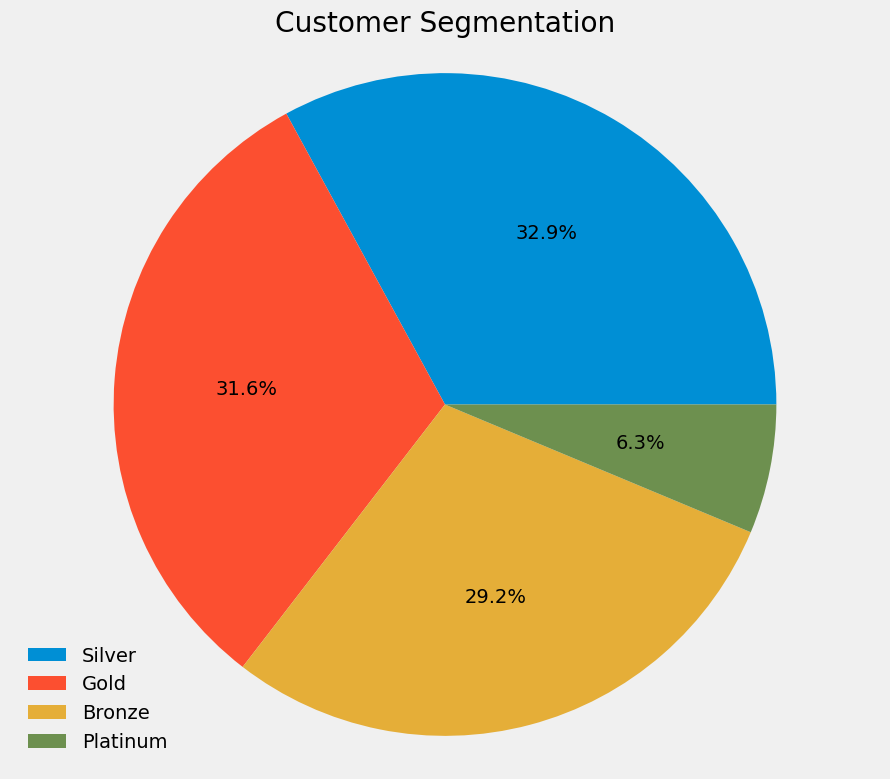

In [128]:
segment_counts = RMF_df['Customer_segment'].value_counts()
segments = segment_counts.index
counts = segment_counts.values

plt.figure(figsize=(10, 9))
plt.pie(counts, autopct='%.1f%%')

legend = plt.legend(segments,loc="lower left")
legend.get_frame().set_alpha(0.0) 

plt.axis('equal')

plt.title('Customer Segmentation')

plt.show()

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/523197414.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




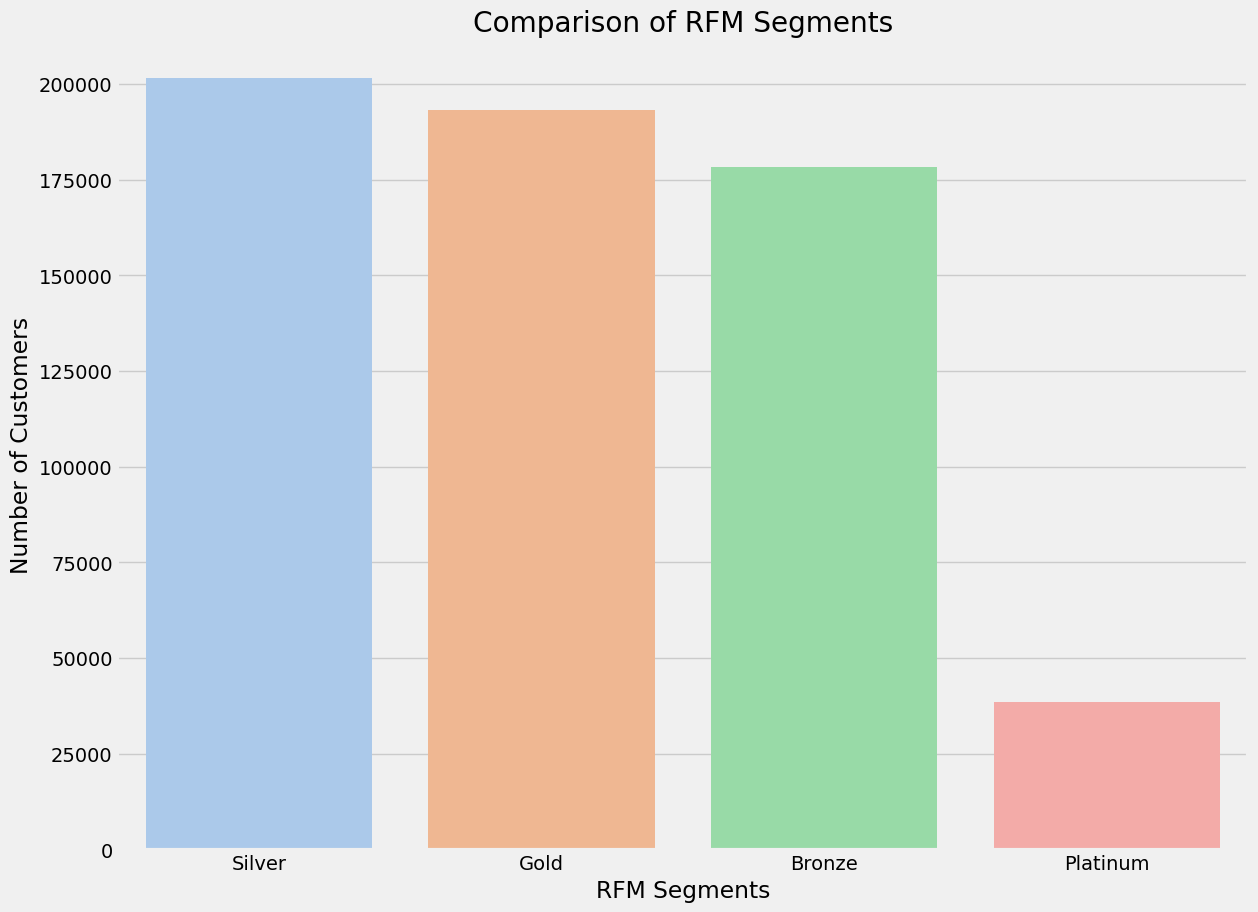

In [129]:
plt.figure(figsize=(13,10))
sns.barplot(x=segments, y=segment_counts, palette='pastel')

plt.title('Comparison of RFM Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')

plt.show()

Segment them to gather more sightful information

In [99]:
kmean_df = RMF_df.copy()

In [100]:
kmean_df

,CustomerID,Frequency,Gender,Location,AccountBalance,Amount,Age,Date,Monetary,Recency,R_rank_norm,F_rank_norm,M_rank_norm,RMF_Score,Customer_segment
269975,C4540712,1,M,THANE,62640.726626,107.983150,63.0,2016-01-08,107.983150,1,100.0,26.096036,12.744170,1.48,Lost Customers
41987,C1532436,1,M,JAMSHEDPUR,107938.377031,1559.982222,42.0,2016-01-08,1559.982222,1,100.0,26.096036,51.048796,2.57,Low Value Customers
101929,C2330354,1,M,GOREGAON (E) MUMBAI,12863.051418,618.946570,49.0,2016-01-08,618.946570,1,100.0,26.096036,31.751350,2.02,Low Value Customers
374115,C5934625,1,M,LIMITED BILASPUR,0.521206,3.809890,26.0,2016-01-08,3.809890,1,100.0,26.096036,2.443456,1.18,Lost Customers
274191,C4623133,1,M,JAMSHEDPUR,13428.141099,532.192860,20.0,2016-01-08,532.192860,1,100.0,26.096036,29.331116,1.95,Low Value Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38019,C1511449,1,M,AMBALA,1.900156,10238.683503,24.0,2016-12-09,10238.683503,1,100.0,26.096036,96.062867,3.85,Medium Value Customer
557374,C8361933,1,F,KADAPA,23467.093556,317.169076,28.0,2016-12-09,317.169076,1,100.0,26.096036,22.318487,1.75,Low Value Customers
182870,C3419860,1,F,GURGAON,16437.782930,2511.170533,33.0,2016-12-09,2511.170533,1,100.0,26.096036,63.717742,2.93,Low Value Customers
347093,C5611237,1,M,JOUNK)DISTT PAURI GARHWAL RISHIKESH,7422.441683,760.031176,37.0,2016-12-09,760.031176,1,100.0,26.096036,35.326593,2.12,Low Value Customers


In [101]:
kmean_df.drop(['CustomerID','R_rank_norm','F_rank_norm','M_rank_norm','Location','Customer_segment','Date'],axis=1, inplace=True)

In [102]:
kmean_df

,Frequency,Gender,AccountBalance,Amount,Age,Monetary,Recency,RMF_Score
269975,1,M,62640.726626,107.983150,63.0,107.983150,1,1.48
41987,1,M,107938.377031,1559.982222,42.0,1559.982222,1,2.57
101929,1,M,12863.051418,618.946570,49.0,618.946570,1,2.02
374115,1,M,0.521206,3.809890,26.0,3.809890,1,1.18
274191,1,M,13428.141099,532.192860,20.0,532.192860,1,1.95
...,...,...,...,...,...,...,...,...
38019,1,M,1.900156,10238.683503,24.0,10238.683503,1,3.85
557374,1,F,23467.093556,317.169076,28.0,317.169076,1,1.75
182870,1,F,16437.782930,2511.170533,33.0,2511.170533,1,2.93
347093,1,M,7422.441683,760.031176,37.0,760.031176,1,2.12


In [103]:
# Lets make M as 1 and Female as 0 

kmean_df['Gender'].replace({'M':1,'F':0}, inplace=True)

kmean_df

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/767016375.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kmean_df['Gender'].replace({'M':1,'F':0}, inplace=True)
/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/767016375.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

,Frequency,Gender,AccountBalance,Amount,Age,Monetary,Recency,RMF_Score
269975,1,1,62640.726626,107.983150,63.0,107.983150,1,1.48
41987,1,1,107938.377031,1559.982222,42.0,1559.982222,1,2.57
101929,1,1,12863.051418,618.946570,49.0,618.946570,1,2.02
374115,1,1,0.521206,3.809890,26.0,3.809890,1,1.18
274191,1,1,13428.141099,532.192860,20.0,532.192860,1,1.95
...,...,...,...,...,...,...,...,...
38019,1,1,1.900156,10238.683503,24.0,10238.683503,1,3.85
557374,1,0,23467.093556,317.169076,28.0,317.169076,1,1.75
182870,1,0,16437.782930,2511.170533,33.0,2511.170533,1,2.93
347093,1,1,7422.441683,760.031176,37.0,760.031176,1,2.12


In [106]:
#Scaling is important for K-Means
df_scaled= StandardScaler().fit_transform(kmean_df)
df_scaled = pd.DataFrame(df_scaled, columns=kmean_df.columns)

df_scaled

,Frequency,Gender,AccountBalance,Amount,Age,Monetary,Recency,RMF_Score
0,-0.781796,0.850196,-0.306056,-0.752666,2.662348,-0.780330,-0.612418,-1.293944
1,-0.781796,0.850196,-0.057684,-0.006304,0.660858,-0.340664,-0.612418,-0.076614
2,-0.781796,0.850196,-0.578993,-0.490019,1.328021,-0.625610,-0.612418,-0.690863
3,-0.781796,0.850196,-0.649519,-0.806213,-0.864087,-0.811874,-0.612418,-1.628989
4,-0.781796,0.850196,-0.575894,-0.534612,-1.435941,-0.651879,-0.612418,-0.769040
...,...,...,...,...,...,...,...,...
611506,-0.781796,0.850196,-0.649512,4.454752,-1.054705,2.287249,-0.612418,1.352910
611507,-0.781796,-1.176199,-0.520849,-0.645139,-0.673469,-0.716988,-0.612418,-0.992404
611508,-0.781796,-1.176199,-0.559392,0.482629,-0.196924,-0.052644,-0.612418,0.325439
611509,-0.781796,0.850196,-0.608824,-0.417498,0.184313,-0.582890,-0.612418,-0.579182


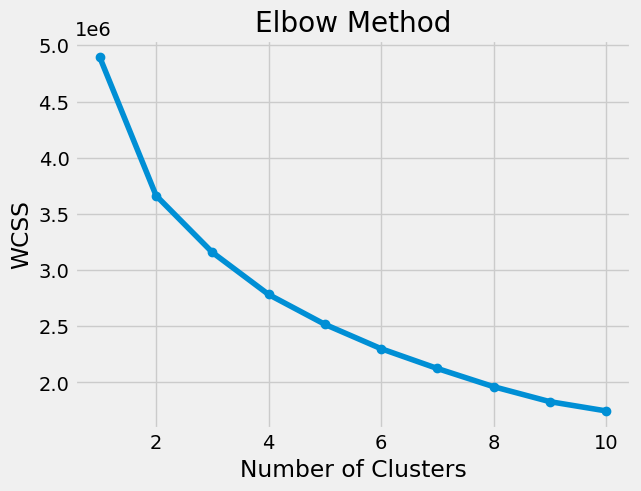

In [111]:
# Initialize a list to store the within-cluster sum of squares (WCSS)
wcss = []

#Lets run K-means for different clusters
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

#Elbow Curve
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [117]:
kmeans = KMeans(n_clusters=4, init='random', max_iter=300, random_state=42)
kmeans.fit(df_scaled)
df_scaled['Label'] = kmeans.labels_

df_scaled

,Frequency,Gender,AccountBalance,Amount,Age,Monetary,Recency,RMF_Score,Label
0,-0.781796,0.850196,-0.306056,-0.752666,2.662348,-0.780330,-0.612418,-1.293944,1
1,-0.781796,0.850196,-0.057684,-0.006304,0.660858,-0.340664,-0.612418,-0.076614,1
2,-0.781796,0.850196,-0.578993,-0.490019,1.328021,-0.625610,-0.612418,-0.690863,1
3,-0.781796,0.850196,-0.649519,-0.806213,-0.864087,-0.811874,-0.612418,-1.628989,1
4,-0.781796,0.850196,-0.575894,-0.534612,-1.435941,-0.651879,-0.612418,-0.769040,1
...,...,...,...,...,...,...,...,...,...
611506,-0.781796,0.850196,-0.649512,4.454752,-1.054705,2.287249,-0.612418,1.352910,0
611507,-0.781796,-1.176199,-0.520849,-0.645139,-0.673469,-0.716988,-0.612418,-0.992404,2
611508,-0.781796,-1.176199,-0.559392,0.482629,-0.196924,-0.052644,-0.612418,0.325439,2
611509,-0.781796,0.850196,-0.608824,-0.417498,0.184313,-0.582890,-0.612418,-0.579182,1


Lets visualize our clusters

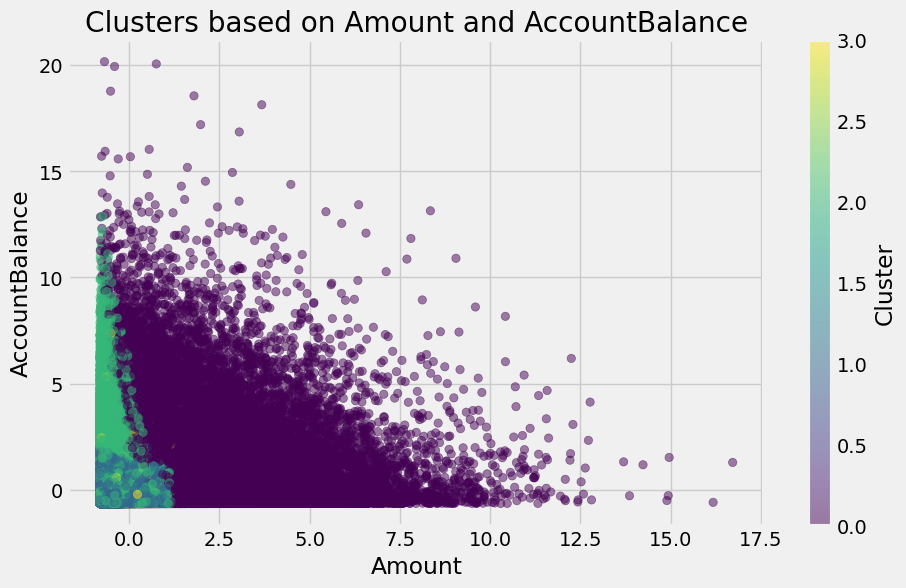

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['Amount'], df_scaled['AccountBalance'], c=df_scaled['Label'], cmap='viridis', alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('AccountBalance')
plt.title('Clusters based on Amount and AccountBalance')
plt.colorbar(label='Cluster')
plt.show()

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/1249029700.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='Amount', data=df_scaled, palette=palette)


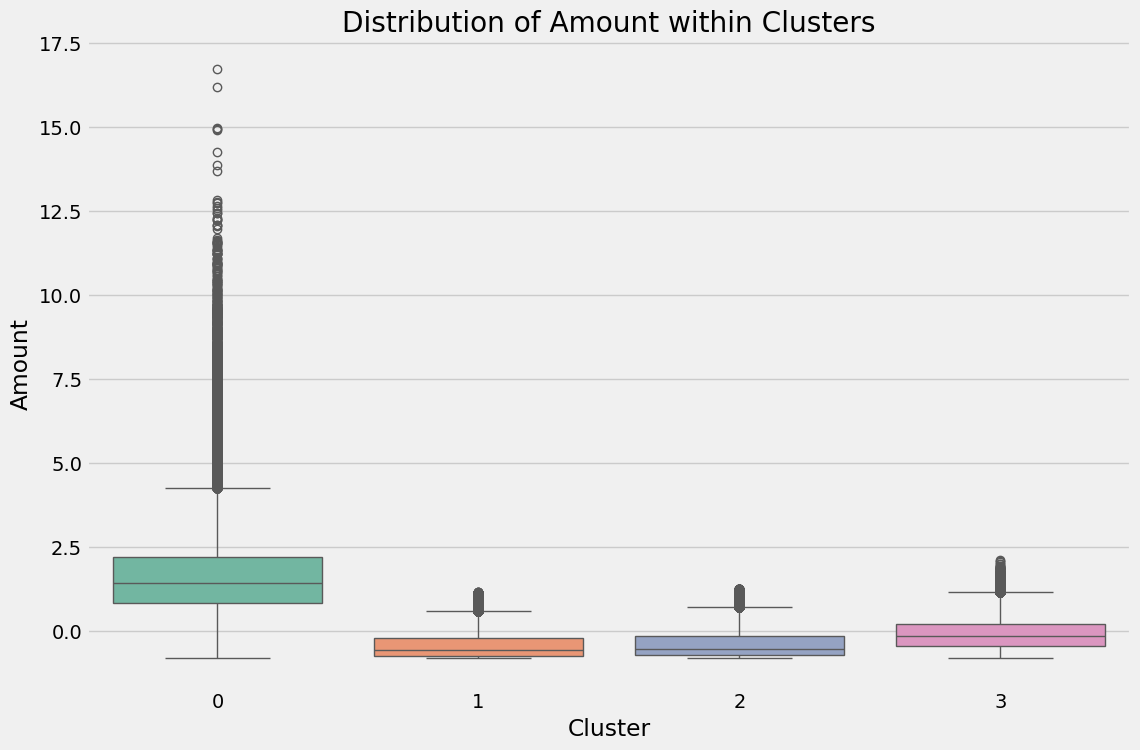

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_2833/1249029700.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='AccountBalance', data=df_scaled, palette=palette)


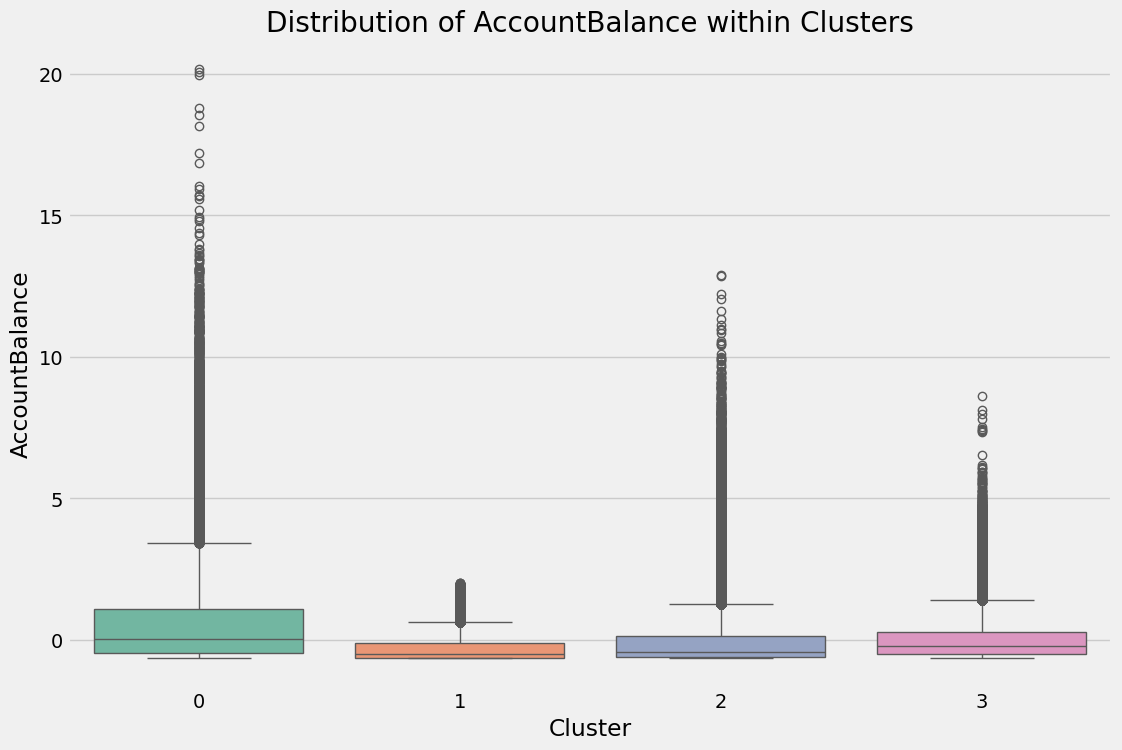

In [119]:
palette = sns.color_palette("Set2", n_colors=4)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='Amount', data=df_scaled, palette=palette)
plt.title('Distribution of Amount within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Amount')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='AccountBalance', data=df_scaled, palette=palette)
plt.title('Distribution of AccountBalance within Clusters')
plt.xlabel('Cluster')
plt.ylabel('AccountBalance')
plt.show()

In [125]:
attributes = df_scaled.columns[:7]
colors = ['#81ecec', '#fa983a', '#eb2f06', '#b8e994']  

fig = go.Figure()
for index in range(4):  
    fig.add_trace(go.Scatterpolar(
        r=df_scaled[df_scaled['Label'] == index][attributes].mean(),
        theta=attributes,
        fill='toself',
        fillcolor=colors[index],
        opacity=0.4,
        name=f'Cluster {index+1}'
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title="Cluster attributes",
    height=800, 
    width=1000  
)
fig.show()